# WEB SCRAPING -  Analyse des statistiques standard des joueurs des 5 grandes ligues européennes 2023-2024. 

Le web scraping est une technique qui consiste à extraire des données d’un site web en utilisant un programme informatique. Le web scraping peut être utilisé pour diverses raisons, comme la collecte d’informations, l’analyse de données, la veille concurrentielle, etc.

Dans ce cas présent le web scraping consistera à la collecte d’informations et l’analyse de données sur les statistiques standard des joueurs des 5 grandes ligues européennes 2023-2024. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib

In [2]:
df = pd.read_html('https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats')[0]
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk             Player             Nation   
0                     1         Max Aarons            eng ENG   
1                     2   Brenden Aaronson             us USA   
2                     3    Paxten Aaronson             us USA   
3                     4   Yunis Abdelhamid             ma MAR   
4                     5  Salis Abdul Samed             gh GHA   
...                 ...                ...                ...   
2523               2427      Igor Zubeldia             es ESP   
2524               2428   Martín Zubimendi             es ESP   
2525               2429    Martin Ødegaard             no NOR   
2526               2430        Milan Đurić             ba BIH   
2527               2431   Mateusz Łęgowski             pl POL   

     Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                    Pos              Squad                Comp   
0                    DF        Bournemouth  eng Premier League   
1                    MF       Union Berlin       de Bundesliga   
2                    MF     Eint Frankfurt       de Bundesliga   
3                    DF              Reims          fr Ligue 1   
4                    MF               Lens          fr Ligue 1   
...                 ...                ...                 ...   
2523                 DF      Real Sociedad          es La Liga   
2524                 MF      Real Sociedad          es La Liga   
2525                 MF            Arsenal  eng Premier League   
2526                 FW      Hellas Verona          it Serie A   
2527                 MF        Salernitana          it Serie A   

     Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time         ...  \
                    Age               Born           MP Starts  ...   
0                24-004               2000           13     11  ...   
1                23-078               2000           11      4  ...   
2                20-135               2003            7      1  ...   
3                36-102               1987           16     16  ...   
4                23-288               2000           17     14  ...   
...                 ...                ...          ...    ...  ...   
2523             26-284               1997           18     17  ...   
2524             24-340               1999           19     17  ...   
2525             25-022               1998           17     17  ...   
2526             33-231               1990           18     11  ...   
2527             20-344               2003           18      8  ...   

     Per 90 Minutes                                                       \
                Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG   
0              0.09  0.09  0.00   0.09  0.00  0.07   0.07  0.00     0.07   
1              0.00  0.00  0.00   0.00  0.04  0.07   0.11  0.04     0.11   
2              0.89  0.89  0.00   0.89  0.11  0.07   0.19  0.11     0.19   
3              0.00  0.19  0.19   0.19  0.14  0.01   0.15  0.14     0.15   
4              0.00  0.00  0.00   0.00  0.06  0.04   0.10  0.06     0.10   
...             ...   ...   ...    ...   ...   ...    ...   ...      ...   
2523           0.06  0.06  0.00   0.06  0.02  0.04   0.06  0.02     0.06   
2524           0.06  0.28  0.22   0.28  0.11  0.06   0.17  0.11     0.17   
2525           0.18  0.42  0.12   0.30  0.24  0.21   0.45  0.14     0.35   
2526           0.09  0.43  0.26   0.34  0.29  0.10   0.39  0.15     0.25   
2527           0.00  0.00  0.00   0.00  0.02  0.02   0.04  0.02     0.04   

     Unnamed: 37_level_0  
                 Matches  
0                Matches  
1                Matches  
2                Matches  
3                Matches  
4                Matches  
...                  ...  
2523             Matches  
2524             Matches  
2525             Matches  
2526             Matches  
2527             Matches  

[2528 rows x 38 columns]

In [3]:
#Permet de voir le nombre de lignes et de colonnes de notre dataframe
df.shape

(2528, 38)

In [4]:
df.columns = df.columns.droplevel()
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-004,2000,13,11,...,0.09,0.09,0.00,0.09,0.00,0.07,0.07,0.00,0.07,Matches
1,2,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-078,2000,11,4,...,0.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-135,2003,7,1,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-102,1987,16,16,...,0.00,0.19,0.19,0.19,0.14,0.01,0.15,0.14,0.15,Matches
4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-288,2000,17,14,...,0.00,0.00,0.00,0.00,0.06,0.04,0.10,0.06,0.10,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2427,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-284,1997,18,17,...,0.06,0.06,0.00,0.06,0.02,0.04,0.06,0.02,0.06,Matches
2524,2428,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-340,1999,19,17,...,0.06,0.28,0.22,0.28,0.11,0.06,0.17,0.11,0.17,Matches
2525,2429,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-022,1998,17,17,...,0.18,0.42,0.12,0.30,0.24,0.21,0.45,0.14,0.35,Matches
2526,2430,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-231,1990,18,11,...,0.09,0.43,0.26,0.34,0.29,0.10,0.39,0.15,0.25,Matches


In [5]:
#Voir le type de donnée dans chaque colonnes
df.dtypes

Rk          object
Player      object
Nation      object
Pos         object
Squad       object
Comp        object
Age         object
Born        object
MP          object
Starts      object
Min         object
90s         object
Gls         object
Ast         object
G+A         object
G-PK        object
PK          object
PKatt       object
CrdY        object
CrdR        object
xG          object
npxG        object
xAG         object
npxG+xAG    object
PrgC        object
PrgP        object
PrgR        object
Gls         object
Ast         object
G+A         object
G-PK        object
G+A-PK      object
xG          object
xAG         object
xG+xAG      object
npxG        object
npxG+xAG    object
Matches     object
dtype: object

In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'],
      dtype='object')

# Nettoyage de donnée

<AxesSubplot:>

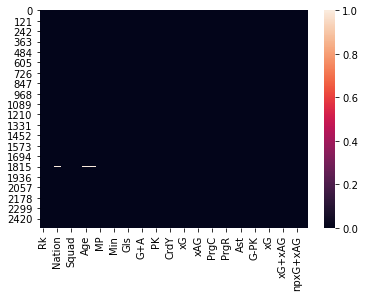

In [7]:
#Utiliser la heatmap pour voir les valeurs nulles
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
#Pour afficher le nombre de valeurs nulles dans chaque colonne
df.isnull().sum()

Rk          0
Player      0
Nation      2
Pos         0
Squad       0
Comp        0
Age         2
Born        2
MP          0
Starts      0
Min         0
90s         0
Gls         0
Ast         0
G+A         0
G-PK        0
PK          0
PKatt       0
CrdY        0
CrdR        0
xG          7
npxG        7
xAG         7
npxG+xAG    7
PrgC        7
PrgP        7
PrgR        7
Gls         0
Ast         0
G+A         0
G-PK        0
G+A-PK      0
xG          7
xAG         7
xG+xAG      7
npxG        7
npxG+xAG    7
Matches     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
#Verifier si les valeurs null sont supprimer 
df.isnull().sum()

Rk          0
Player      0
Nation      0
Pos         0
Squad       0
Comp        0
Age         0
Born        0
MP          0
Starts      0
Min         0
90s         0
Gls         0
Ast         0
G+A         0
G-PK        0
PK          0
PKatt       0
CrdY        0
CrdR        0
xG          0
npxG        0
xAG         0
npxG+xAG    0
PrgC        0
PrgP        0
PrgR        0
Gls         0
Ast         0
G+A         0
G-PK        0
G+A-PK      0
xG          0
xAG         0
xG+xAG      0
npxG        0
npxG+xAG    0
Matches     0
dtype: int64

In [11]:
#Est-ce qu'il y'a des duplicata ?
df[df.duplicated()]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
51,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
77,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
103,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
129,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
155,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2443,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2469,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2495,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches


In [12]:
#supprimer les duplicata
df.drop_duplicates(inplace = True)

<ipython-input-12-de9355df29b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [13]:
#Vérification si les duplicata ont bien ete supprimer
df[df.duplicated()]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches


In [14]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'],
      dtype='object')

In [15]:
# Supprimer les colonnes
df.drop([ 'Rk','90s','Born','npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
        'G+A-PK', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'
       ], axis=1, inplace=True)
df

/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls,...,CrdY,CrdR,xG,xAG,Gls,Ast,G+A,G-PK,xG,xAG
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-004,13,11,995,0,...,1,0,0.0,0.8,0.00,0.09,0.09,0.00,0.00,0.07
1,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-078,11,4,327,0,...,2,1,0.1,0.3,0.00,0.00,0.00,0.00,0.04,0.07
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-135,7,1,101,0,...,0,0,0.1,0.1,0.00,0.89,0.89,0.00,0.11,0.07
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-102,16,16,1440,3,...,3,0,2.2,0.2,0.19,0.00,0.19,0.19,0.14,0.01
4,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-288,17,14,1249,0,...,2,0,0.8,0.5,0.00,0.00,0.00,0.00,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-284,18,17,1499,0,...,7,0,0.3,0.7,0.00,0.06,0.06,0.00,0.02,0.04
2524,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-340,19,17,1608,4,...,3,0,2.0,1.1,0.22,0.06,0.28,0.22,0.11,0.06
2525,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-022,17,17,1505,4,...,1,0,3.9,3.5,0.24,0.18,0.42,0.12,0.24,0.21
2526,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-231,18,11,1049,4,...,2,0,3.4,1.1,0.34,0.09,0.43,0.26,0.29,0.10


In [16]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'xAG', 'Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'xAG'],
      dtype='object')

In [17]:
# Renommer deux colonnes qui porte le même nom 
cols = []
count = 1
for column in df.columns:
    if column == 'xG':
        cols.append(f'xG{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [18]:
cols = []
count = 1
for column in df.columns:
    if column == 'xAG':
        cols.append(f'xAG{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [19]:
cols = []
count = 1
for column in df.columns:
    if column == 'Ast':
        cols.append(f'Ast{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [20]:
cols = []
count = 1
for column in df.columns:
    if column == 'Gls':
        cols.append(f'Gls{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [21]:
cols = []
count = 1
for column in df.columns:
    if column == 'G+A':
        cols.append(f'G+A{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [22]:
cols = []
count = 1
for column in df.columns:
    if column == 'G-PK':
        cols.append(f'G-PK{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [23]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1', 'Gls2', 'Ast2', 'G+A2', 'G-PK2', 'xG2', 'xAG2'],
      dtype='object')

In [24]:
df['G-PK1']

0       0
1       0
2       0
3       3
4       0
       ..
2523    0
2524    4
2525    2
2526    3
2527    0
Name: G-PK1, Length: 2422, dtype: object

In [25]:
# Supprimer les colonnes
df.drop([ 'xG2','xAG2','Gls2','Ast2','G+A2','G-PK2'], axis=1, inplace=True)
df

/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-004,13,11,995,0,1,1,0,0,0,1,0,0.0,0.8
1,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-078,11,4,327,0,0,0,0,0,0,2,1,0.1,0.3
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-135,7,1,101,0,1,1,0,0,0,0,0,0.1,0.1
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-102,16,16,1440,3,0,3,3,0,0,3,0,2.2,0.2
4,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-288,17,14,1249,0,0,0,0,0,0,2,0,0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-284,18,17,1499,0,1,1,0,0,0,7,0,0.3,0.7
2524,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-340,19,17,1608,4,1,5,4,0,0,3,0,2.0,1.1
2525,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-022,17,17,1505,4,3,7,2,2,2,1,0,3.9,3.5
2526,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-231,18,11,1049,4,1,5,3,1,2,2,0,3.4,1.1


In [26]:
# Supprimer les premiers caractères de la colonne Nation
df['Nation'] = df['Nation'].str.slice(start=3)
df['Comp'] = df['Comp'].str.slice(start=3)

<ipython-input-26-65c31f6e76d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nation'] = df['Nation'].str.slice(start=3)
<ipython-input-26-65c31f6e76d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comp'] = df['Comp'].str.slice(start=3)


In [27]:
# Supprimer les quatre derniers caractères d'une colonne
df['Age'] = df['Age'].str.slice(stop=-4)

<ipython-input-27-c9a7318f5835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].str.slice(stop=-4)


In [28]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1'],
      dtype='object')

In [29]:
df [(df['Player'] == 'Player')]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
25,Player,ion,Pos,Squad,p,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,xAG


In [30]:
df = df.drop(25)

In [31]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1'],
      dtype='object')

# La data

In [32]:
#Convertir une colonne en Int
df['Age'] = df['Age'].astype(int)
df['MP'] = df['MP'].astype(int)
df['Starts'] = df['Starts'].astype(int)
df['Min'] = df['Min'].astype(int)
df['PK'] = df['PK'].astype(int)
df['PKatt'] = df['PKatt'].astype(int)
df['CrdY'] = df['CrdY'].astype(int)
df['CrdR'] = df['CrdR'].astype(int)
df['Ast1'] = df['Ast1'].astype(int)
df['G-PK1'] = df['G-PK1'].astype(int)


#Convertir colonne en Float
df['xG1'] = df['xG1'].astype(float)
df['xAG1'] = df['xAG1'].astype(float)
df['Gls1'] = df['Gls1'].astype(float)
df['G+A1'] = df['G+A1'].astype(float)


In [33]:
#Ajouter une nouvelle colonne : Nombre total de cartons = cartons jaune + cartons rouge
df['Total_Cards'] = df['CrdY']+df['CrdR']

In [34]:
df.dtypes

Player          object
Nation          object
Pos             object
Squad           object
Comp            object
Age              int64
MP               int64
Starts           int64
Min              int64
Gls1           float64
Ast1             int64
G+A1           float64
G-PK1            int64
PK               int64
PKatt            int64
CrdY             int64
CrdR             int64
xG1            float64
xAG1           float64
Total_Cards      int64
dtype: object

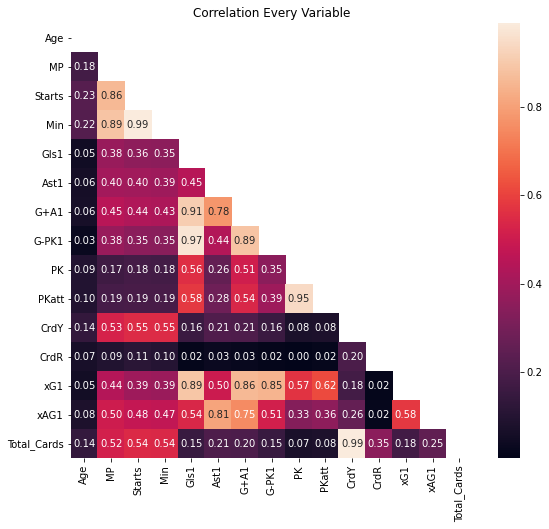

In [35]:
student_corr = df.corr()
mask = np.zeros_like(student_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 8))
ax = sns.heatmap(student_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation Every Variable")
plt.show()

In [36]:
df['Pos'].unique()

array(['DF', 'MF', 'FW', 'MF,FW', 'FW,MF', 'MF,DF', 'DF,MF', 'GK',
       'DF,FW', 'FW,DF'], dtype=object)

# Analyse exploratoire des données

In [37]:
Age_mini= df[df['Age']==df['Age'].min()]
Age_mini

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
371,Francesco Camarda,ITA,FW,Milan,Serie A,15,2,0,14,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [38]:
print("le joueur le plus jeunes des 5 grandes ligues européennes  :", Age_mini['Player'])

le joueur le plus jeunes des 5 grandes ligues européennes  : 371    Francesco Camarda
Name: Player, dtype: object


In [39]:
Age_maxi = df[df['Age']==df['Age'].max()]
Age_maxi

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
316,Claudio Bravo,CHI,GK,Betis,La Liga,40,7,7,630,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
536,Dante,BRA,DF,Nice,Ligue 1,40,17,17,1530,0.0,1,1.0,0,0,0,4,0,0.4,0.3,4
1555,Antonio Mirante,ITA,GK,Milan,Serie A,40,1,1,90,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [40]:
print("le joueur le plus vieux des des 5 grandes ligues européennes  :", Age_maxi['Player'])

le joueur le plus vieux des des 5 grandes ligues européennes  : 316       Claudio Bravo
536               Dante
1555    Antonio Mirante
Name: Player, dtype: object


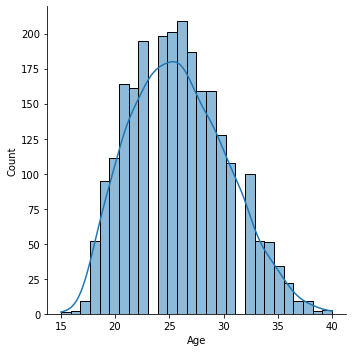

In [41]:
sns.displot(data=df, x="Age", kde=True )

Le graphique de densité ci-dessus a montré que la plupart des joueurs des 5 grandes ligues européennes 2023-2024
sont agée de 18 et 35ans, ce qui est l'âge d'un footballeur.

<AxesSubplot:xlabel='Comp'>

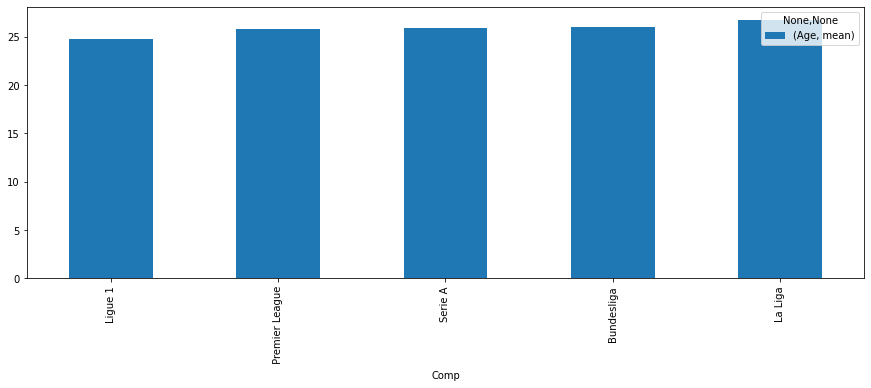

In [42]:
Moyenne_age = df.groupby('Comp').agg({'Age':['mean']})
Moyenne_age.sort_values(by=('Age', 'mean')).plot(kind='bar',figsize=(15,5))

In [43]:
Moyenne_age = df.groupby(by='Comp', as_index=False)['Age'].mean().sort_values(by='Age',ascending=True)[:1]
print("Le championnat qui compte en moyenne les plus jeune joueur des 5 grandes ligues européennes 2023-2024 est :",Moyenne_age)

Le championnat qui compte en moyenne les plus jeune joueur des 5 grandes ligues européennes 2023-2024 est :       Comp        Age
3  Ligue 1  24.788288


# Le championnat qui compte le plus d'équipes des 5 grandes ligues européennes 2023-2024

<AxesSubplot:>

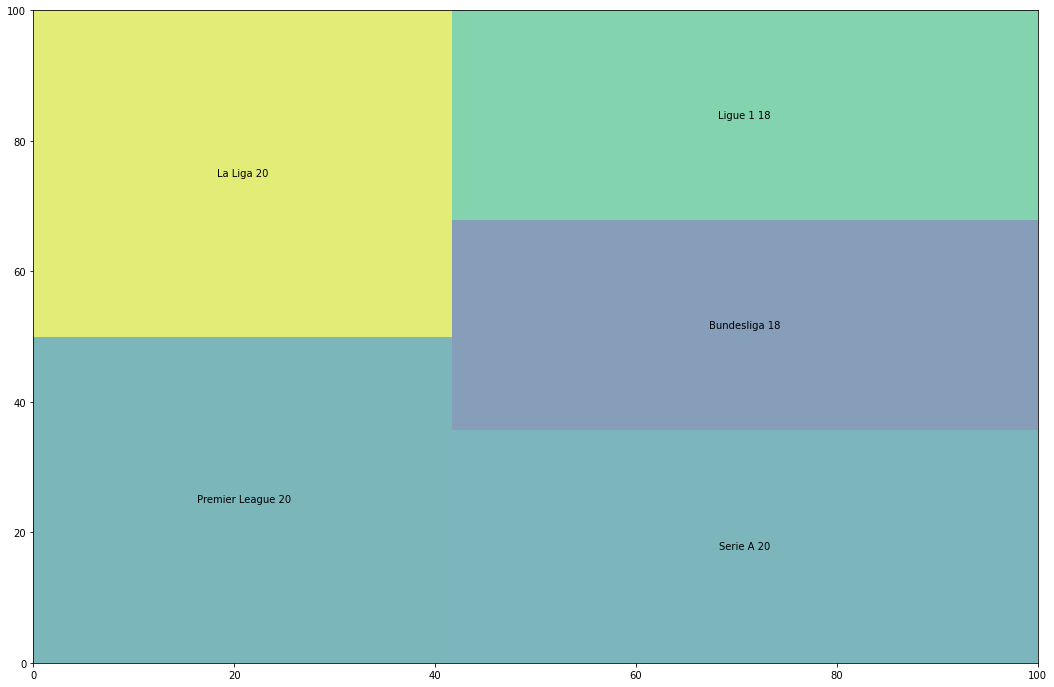

In [44]:
fig = plt.figure(figsize=(18,12))
sizes=df.groupby('Comp',)['Squad'].nunique().sort_values(ascending= False).tolist() 
label=df.groupby('Comp',)['Squad'].nunique().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [45]:
NB_joueurs_equipes = df.groupby('Comp',)['Squad'].nunique().sort_values(ascending = False)[:1]
print("Le championnat qui compte le plus d'équipes des 5 grandes ligues européennes 2023-2024 est :",NB_joueurs_equipes)

Le championnat qui compte le plus d'équipes des 5 grandes ligues européennes 2023-2024 est : Comp
 Premier League    20
Name: Squad, dtype: int64


# Le  championnat qui marque le plus des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Comp'>

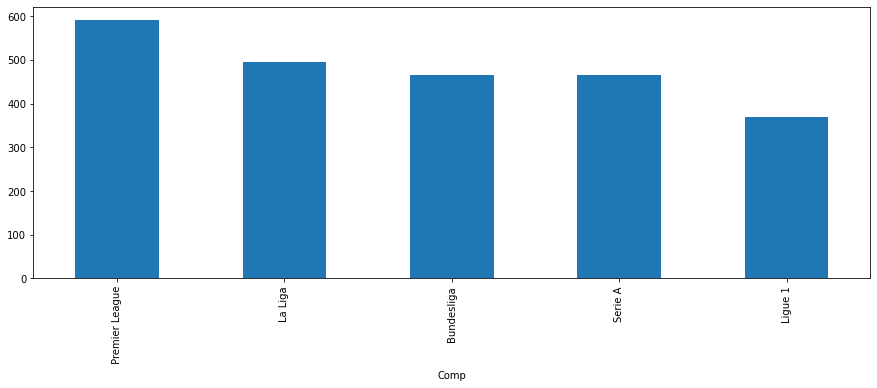

In [46]:
but_champ = df.groupby('Comp')['Gls1'].sum().sort_values(ascending = False)
but_champ.plot(figsize=(15,5),kind="bar")

In [47]:
but_champ = df.groupby('Comp')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le championnat qui marque le plus des 5 grandes ligues européennes 2023-2024 est la :",but_champ)

Le championnat qui marque le plus des 5 grandes ligues européennes 2023-2024 est la : Comp
 Premier League    592.0
Name: Gls1, dtype: float64


# Les joueurs qui jouent le plus de minutes des 5 grandes ligues européennes 2023-2024

In [48]:
titulaire_max = df[df['Min']==df['Min'].max()]
titulaire_max

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
86,Joachim Andersen,DEN,DF,Crystal Palace,Premier League,27,20,20,1800,2.0,1,3.0,2,0,0,4,0,1.2,1.4,4
763,Wes Foderingham,ENG,GK,Sheffield Utd,Premier League,32,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
1162,Max Kilman,ENG,DF,Wolves,Premier League,26,20,20,1800,1.0,0,1.0,1,0,0,4,0,0.8,0.6,4
1279,Bernd Leno,GER,GK,Fulham,Premier League,31,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
1732,André Onana,CMR,GK,Manchester Utd,Premier League,27,20,20,1800,0.0,0,0.0,0,0,0,3,0,0.0,0.1,3
1862,Jordan Pickford,ENG,GK,Everton,Premier League,29,20,20,1800,0.0,0,0.0,0,0,0,3,0,0.0,0.1,3
2040,William Saliba,FRA,DF,Arsenal,Premier League,22,20,20,1800,1.0,1,2.0,1,0,0,2,0,1.1,0.1,2
2324,James Trafford,ENG,GK,Burnley,Premier League,21,20,20,1800,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2390,Guglielmo Vicario,ITA,GK,Tottenham,Premier League,27,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2


In [49]:
print("Les joueurs qui jouent plus de minutes  :", titulaire_max[['Player','Min']])

Les joueurs qui jouent plus de minutes  :                  Player   Min
86     Joachim Andersen  1800
763     Wes Foderingham  1800
1162         Max Kilman  1800
1279         Bernd Leno  1800
1732        André Onana  1800
1862    Jordan Pickford  1800
2040     William Saliba  1800
2324     James Trafford  1800
2390  Guglielmo Vicario  1800


# Les joueurs qui jouent le moins de minutes des 5 grandes ligues européennes 2023-2024

In [50]:
Pas_titulaire = df[df['Min']==df['Min'].min()]
Pas_titulaire

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
84,Kofi Amoako,GER,MF,Wolfsburg,Bundesliga,18,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
382,Thomas Cannon,IRL,FW,Everton,Premier League,21,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
438,Charlys,BRA,MF,Hellas Verona,Serie A,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
464,Silvi Clúa,ESP,MF,Girona,La Liga,18,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
489,Maxwel Cornet,CIV,MF,West Ham,Premier League,27,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
582,Lamine Diack,SEN,MF,Nantes,Ligue 1,23,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
587,Moussa Diakité,MLI,MF,Cádiz,La Liga,20,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
590,Amadou Diallo,ENG,MF,Newcastle Utd,Premier League,20,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
871,Daniel Gore,ENG,MF,Manchester Utd,Premier League,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1390,Aaron Malouda,FRA,FW,Lille,Ligue 1,18,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [51]:
print("Les joueurs qui jouent le moins de minutes  :", Pas_titulaire[['Player','Min']])

Les joueurs qui jouent le moins de minutes  :                       Player  Min
84               Kofi Amoako    1
382            Thomas Cannon    1
438                  Charlys    1
464               Silvi Clúa    1
489            Maxwel Cornet    1
582             Lamine Diack    1
587           Moussa Diakité    1
590            Amadou Diallo    1
871              Daniel Gore    1
1390           Aaron Malouda    1
1456              Alex Matos    1
1477            Ethan Mbappé    1
1488            James Mcatee    1
1490         James McConnell    1
1650         Michael Ndiweni    1
1681  Rhys Norrington-Davies    1
1735           Tyler Onyango    1
2046       Diadie Samassékou    1
2308           James Tomkins    1


# Le championnat où il y a le plus de tentative de tir au but des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Comp'>

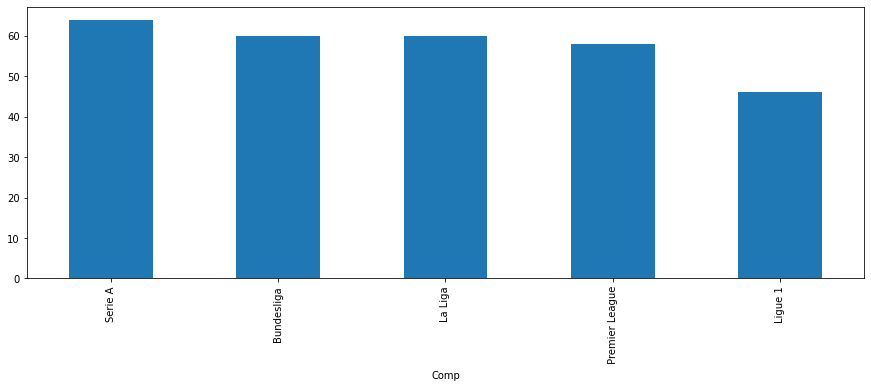

In [52]:
Tantative_tir_but = df.groupby('Comp')['PKatt'].sum().sort_values(ascending = False)
Tantative_tir_but.plot(figsize=(15,5),kind="bar")

In [53]:
Tantative_tir_but = df.groupby('Comp')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le championnat où il y a le plus de tentative de tir au but des 5 grandes ligues européennes 2023-2024 est la :",Tantative_tir_but)

Le championnat où il y a le plus de tentative de tir au but des 5 grandes ligues européennes 2023-2024 est la : Comp
Serie A    64
Name: PKatt, dtype: int64


# Le joueur qui tente le plus de tir au but des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

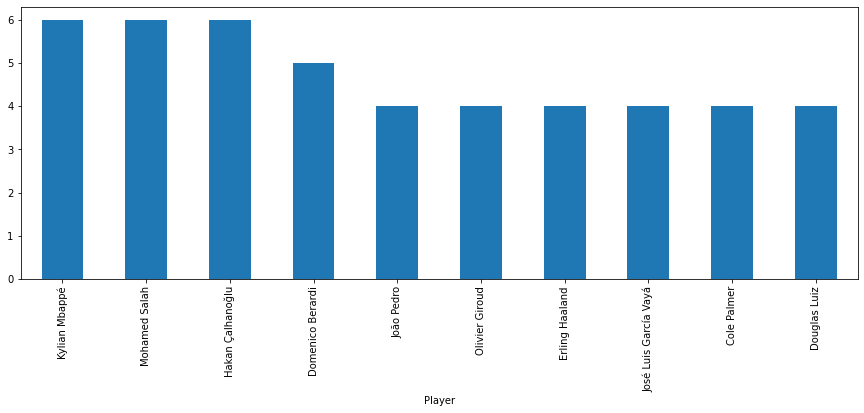

In [54]:
Tantative_joueur_tir_but = df.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_joueur_tir_but.plot(figsize=(15,5),kind="bar")

In [55]:
Tantative_joueur_tir_but = df.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but des 5 grandes ligues européennes 2023-2024 :",Tantative_joueur_tir_but)

Le joueur qui tente le plus de tir au but des 5 grandes ligues européennes 2023-2024 : Player
Kylian Mbappé    6
Name: PKatt, dtype: int64


In [56]:
df.sort_values(by="PKatt", ascending= False)[:5]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
1478,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,25,16,15,1330,18.0,2,20.0,13,5,6,2,0,14.9,2.9,2
365,Hakan Çalhanoğlu,TUR,MF,Inter,Serie A,29,19,19,1558,7.0,3,10.0,1,6,6,4,0,6.0,3.3,4
2037,Mohamed Salah,EGY,FW,Liverpool,Premier League,31,20,20,1739,14.0,8,22.0,10,4,6,2,0,14.3,8.5,2
238,Domenico Berardi,ITA,FW,Sassuolo,Serie A,29,15,15,1303,9.0,3,12.0,4,5,5,6,0,6.4,2.8,6
1343,Douglas Luiz,BRA,MF,Aston Villa,Premier League,25,19,19,1653,6.0,3,9.0,2,4,4,5,0,5.2,2.3,5


# L'équipe qui marque le plus des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Squad'>

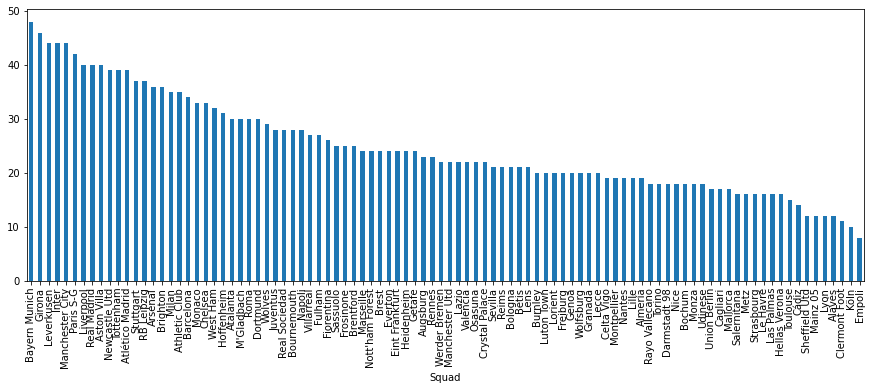

In [57]:
but_par_equipe = df.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_par_equipe.plot(figsize=(15,5),kind="bar")

In [58]:
but_par_equipe = df.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("L'équipe qui marque le plus des 5 grandes ligues européennes 2023-2024 :",but_par_equipe)

L'équipe qui marque le plus des 5 grandes ligues européennes 2023-2024 : Squad
Bayern Munich    48.0
Name: Gls1, dtype: float64


# Meilleurs buteurs des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

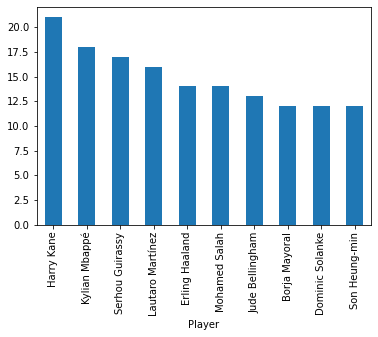

In [59]:
Top_buteur = df[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
Top_buteur.groupby('Player')['Gls1'].sum().sort_values(ascending = False).plot(kind="bar")

In [60]:
Top_buteur = df.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le Meilleurs buteurs des 5 grandes ligues européennes 2023-2024 :",Top_buteur)

Le Meilleurs buteurs des 5 grandes ligues européennes 2023-2024 : Player
Harry Kane    21.0
Name: Gls1, dtype: float64


# Meilleurs Buts sans pénalty des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

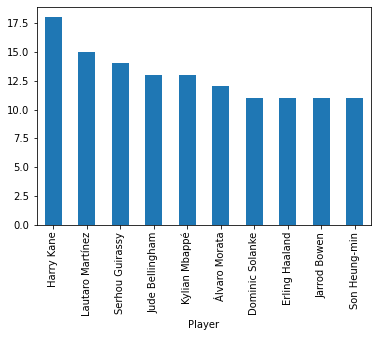

In [61]:
but_sans_penalty = df[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty.groupby('Player')['G-PK1'].sum().sort_values(ascending = False).plot(kind="bar")

In [62]:
but_sans_penalty = df.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le Meilleurs buteurs sans pénalty des 5 grandes ligues européennes 2023-2024 :",Top_buteur)

Le Meilleurs buteurs sans pénalty des 5 grandes ligues européennes 2023-2024 : Player
Harry Kane    21.0
Name: Gls1, dtype: float64


# Meilleurs Buts sur pénalty des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

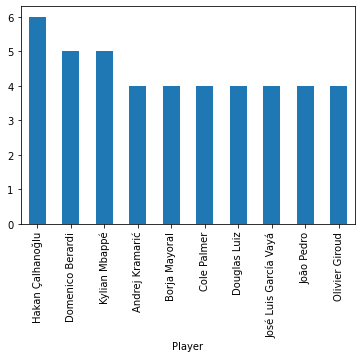

In [63]:
but_penalty = df[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_penalty.groupby('Player')['PK'].sum().sort_values(ascending = False).plot(kind="bar")

In [64]:
but_penalty = df.groupby('Player')['PK'].sum().sort_values(ascending = False)[:1]
print("Le Meilleurs buteurs sur pénalty des 5 grandes ligues européennes 2023-2024 :",but_penalty)

Le Meilleurs buteurs sur pénalty des 5 grandes ligues européennes 2023-2024 : Player
Hakan Çalhanoğlu    6
Name: PK, dtype: int64


# Meilleurs passeurs des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

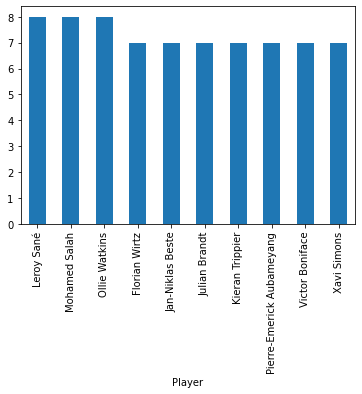

In [65]:
top_assists = df[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists.groupby('Player')['Ast1'].sum().sort_values(ascending = False).plot(kind="bar")

In [66]:
top_assists = df.groupby('Player')['Ast1'].sum().sort_values(ascending = False)[:1]
print("Le Meilleurs passeurs le plus des 5 grandes ligues européennes 2023-2024 :",top_assists)

Le Meilleurs passeurs le plus des 5 grandes ligues européennes 2023-2024 : Player
Leroy Sané    8
Name: Ast1, dtype: int64


# Meilleurs Buteurs(GLS1) + Passeur(Ast1) des 5 grandes ligues européennes 2023-2024

In [67]:
top_but_passeur = df[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:5]
top_but_passeur

,Player,Squad,Gls1,Ast1,G+A1
1128,Harry Kane,Bayern Munich,21.0,5,26.0
2037,Mohamed Salah,Liverpool,14.0,8,22.0
1478,Kylian Mbappé,Paris S-G,18.0,2,20.0
1439,Lautaro Martínez,Inter,16.0,2,18.0
933,Erling Haaland,Manchester City,14.0,4,18.0


In [68]:
top_but_passeur = df.groupby('Player')['G+A1'].sum().sort_values(ascending = False)[:1]
print("Le Meilleurs buteur + passeur le plus des 5 grandes ligues européennes 2023-2024 :",top_but_passeur)

Le Meilleurs buteur + passeur le plus des 5 grandes ligues européennes 2023-2024 : Player
Harry Kane    26.0
Name: G+A1, dtype: float64


# le meilleur score xG Buts attendus des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

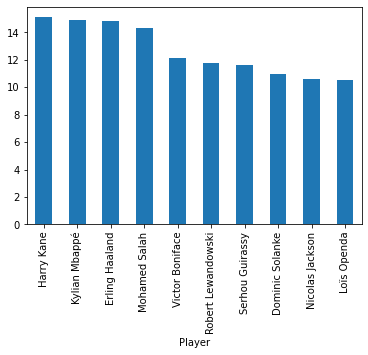

In [69]:
xG_Buts_attendus = df[['Player','xG1']].sort_values(by="xG1",ascending = False)[:10]
xG_Buts_attendus.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [70]:
xG_Buts_attendus = df[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le joueur avec meilleur score xG Buts des 5 grandes ligues européennes 2023-2024:", xG_Buts_attendus)

Le joueur avec meilleur score xG Buts des 5 grandes ligues européennes 2023-2024:           Player          Squad   xG1
1128  Harry Kane  Bayern Munich  15.1


# le meilleur score xAG Buts assistés attendus des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Player'>

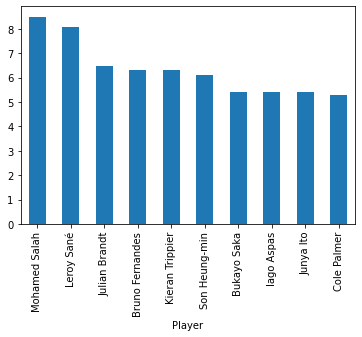

In [71]:
xAG_Buts_assistés_attendus = df[['Player','xAG1']].sort_values(by="xAG1",ascending = False)[:10]
xAG_Buts_assistés_attendus.groupby('Player')['xAG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [72]:
xAG_Buts_assistés_attendus = df[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le jouer avec meilleur xAG Buts assistés attendus des 5 grandes ligues européennes 2023-2024:", xAG_Buts_assistés_attendus)

Le jouer avec meilleur xAG Buts assistés attendus des 5 grandes ligues européennes 2023-2024:              Player      Squad  xAG1
2037  Mohamed Salah  Liverpool   8.5


# Le joueur les plus agressifs des 5 grandes ligues européennes 2023-2024 ayant le plus de cartons

In [73]:
df[['Player','CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
54,Iván Alejo,10,0,10
619,Djené,9,1,10
1276,Mario Lemina,9,1,10
52,Rubén Alcaraz,9,0,9
263,Yves Bissouma,7,2,9
921,Gerard Gumbau,9,0,9
932,Norbert Gyömbér,9,0,9
1788,Leandro Paredes,9,0,9
190,Enzo Barrenechea,8,0,8
315,Lilian Brassier,7,1,8


In [74]:
Jouer_Agressive = df.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons des 5 grandes ligues européennes 2023-2024 :",Jouer_Agressive)

Le joueur avec le plus de cartons des 5 grandes ligues européennes 2023-2024 : Player
Iván Alejo    10
Name: Total_Cards, dtype: int64


# Le championnat qui distribue le plus de cartons des 5 grandes ligues européennes 2023-2024

<AxesSubplot:xlabel='Comp'>

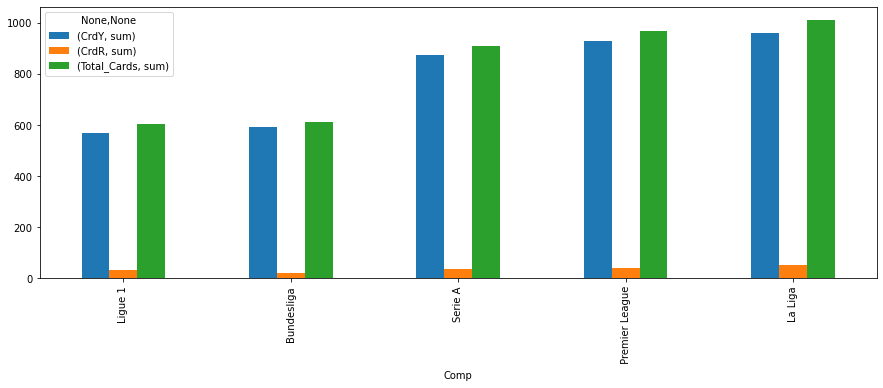

In [75]:
Aggressiv_Championnatt = df.groupby("Comp").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_Championnatt.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [76]:
Aggressiv_Championnatt = df.groupby('Comp')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le championnat qui distribue le plus de cartons des 5 grandes ligues européennes 2023-2024 :",Aggressiv_Championnatt)

Le championnat qui distribue le plus de cartons des 5 grandes ligues européennes 2023-2024 : Comp
La Liga    1012
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive ayant le plus de cartons des 5 grandes ligues européennes 2023-2024 

<AxesSubplot:xlabel='Squad'>

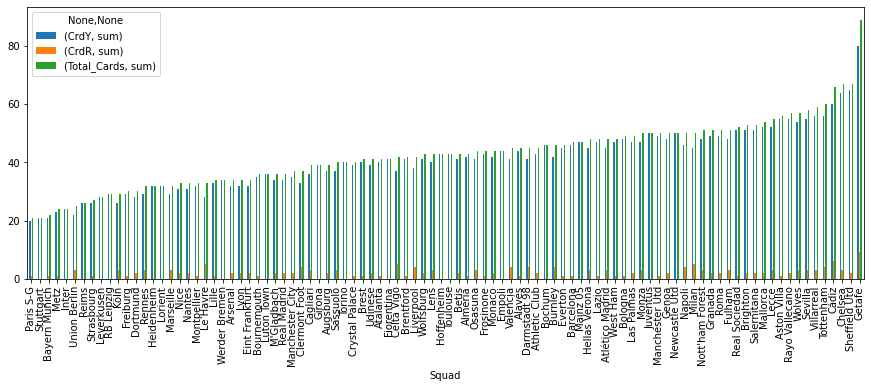

In [77]:
Aggressiv_team = df.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_team.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [78]:
Aggressiv_team = df.groupby(by='Squad', as_index=False)['Total_Cards'].sum().sort_values(by='Total_Cards',ascending=False)[:1]
print("Les équipe les plus agressifs des 5 grandes ligues européennes sont :", Aggressiv_team)

Les équipe les plus agressifs des 5 grandes ligues européennes sont :      Squad  Total_Cards
34  Getafe           89


# Analyse Premier League

In [79]:
Epl = df.query('Comp == " Premier League"')
Epl

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,13,11,995,0.0,1,1.0,0,0,0,1,0,0.0,0.8,1
12,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,Premier League,21,8,3,387,0.0,0,0.0,0,0,0,0,0,0.3,0.5,0
16,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,26,8,6,543,1.0,0,1.0,1,0,0,0,0,0.0,0.1,0
17,Elijah Adebayo,ENG,FW,Luton Town,Premier League,26,19,9,825,5.0,0,5.0,5,0,0,1,0,3.7,0.5,1
19,Simon Adingra,CIV,"FW,MF",Brighton,Premier League,22,17,13,1142,4.0,1,5.0,4,0,0,2,0,2.4,2.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Nicolò Zaniolo,ITA,"FW,MF",Aston Villa,Premier League,24,13,7,503,1.0,0,1.0,1,0,0,4,0,1.7,0.7,4
2502,Anass Zaroury,MAR,"FW,MF",Burnley,Premier League,23,5,1,137,0.0,0,0.0,0,0,0,0,1,0.2,0.0,1
2516,Oleksandr Zinchenko,UKR,DF,Arsenal,Premier League,27,18,14,1204,1.0,1,2.0,1,0,0,2,0,0.4,1.6,2
2522,Kurt Zouma,FRA,DF,West Ham,Premier League,29,16,16,1413,1.0,0,1.0,1,0,0,2,0,1.1,0.0,2


# Le Joueur le plus jeune de Premiere League

In [80]:
#Age minimum en PL
Age_minimum_PL= Epl[['Player','Age','Squad']].min()
print("Le Joueur le plus jeune de Premiere League :", Age_minimum_PL)

Le Joueur le plus jeune de Premiere League : Player    Aaron Cresswell
Age                    17
Squad             Arsenal
dtype: object


# Le Joueur le plus Agée de Premiere League 

In [81]:
#Age maximum en PL
Age_maximum_PL = Epl[['Player','Age','Squad']].max()
print("Le Joueur le plus Agée de Premiere League :", Age_maximum_PL)

Le Joueur le plus Agée de Premiere League : Player    Łukasz Fabiański
Age                     39
Squad               Wolves
dtype: object


<Figure size 864x576 with 0 Axes>

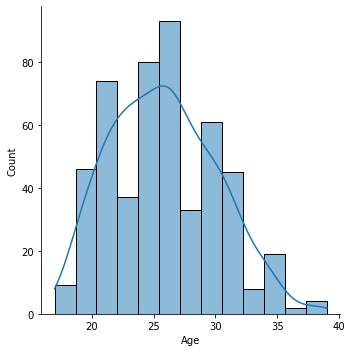

In [82]:
plt.figure(figsize=(12,8))
sns.displot(data=Epl, x="Age", kde=True )

Le graphique de densité ci-dessus a montré que la plupart des joueurs de la première league sont dans la mi-vingtaine, ce qui est l'âge d'un footballeur.

# La nationalité des joueur en PL

<AxesSubplot:>

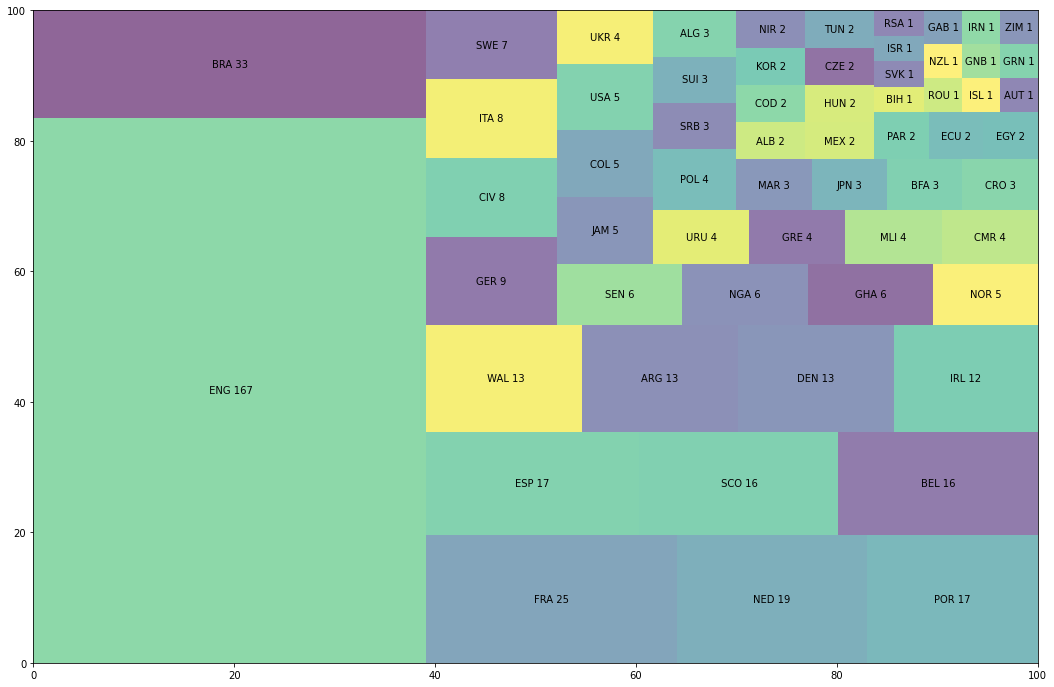

In [83]:
fig = plt.figure(figsize=(18,12))
sizes=Epl.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Epl.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [84]:
nationalité_Epl = Epl.groupby('Nation',)['Player'].count().sort_values(ascending = False)[:1]
print("La nationalité des joueur la plus présente en PL :",nationalité_Epl)

La nationalité des joueur la plus présente en PL : Nation
 ENG    167
Name: Player, dtype: int64


# L'équipe avec le plus de joueur en PL

<AxesSubplot:>

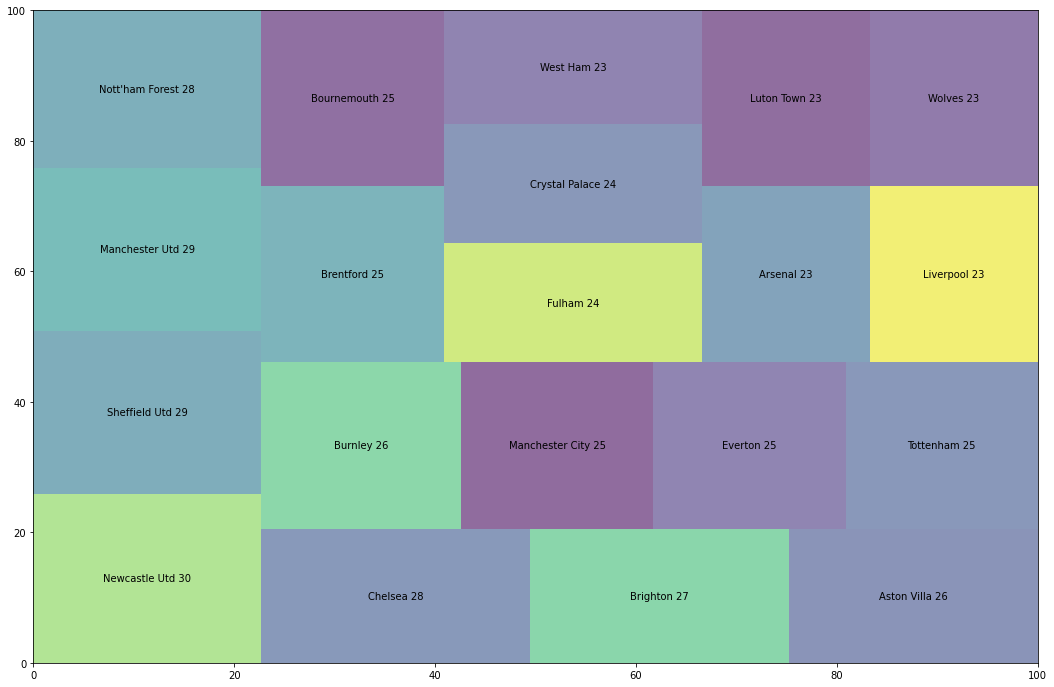

In [85]:
fig = plt.figure(figsize=(18,12))
sizes=Epl.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Epl.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [86]:
NB_joueurs_equipes_Epl = Epl.groupby('Squad',)['Player'].count().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de joueur de PL :",NB_joueurs_equipes_Epl)

L'équipe avec le plus de joueur de PL : Squad
Newcastle Utd    30
Name: Player, dtype: int64


# L'équipe qui marque le plus en PL

<AxesSubplot:xlabel='Squad'>

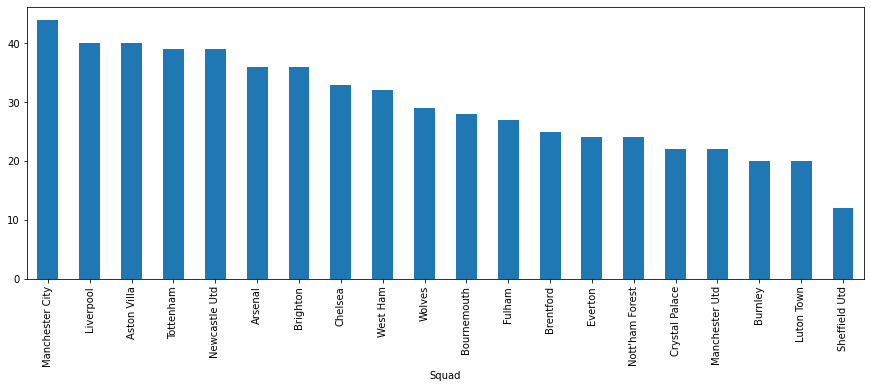

In [87]:
but_par_equipe_pl = Epl.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_par_equipe_pl.plot(figsize=(15,5),kind="bar")

In [88]:
but_par_equipe_pl = Epl.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Les équipe qui marquent le plus en Premiere League :",but_par_equipe_pl)

Les équipe qui marquent le plus en Premiere League : Squad
Manchester City    44.0
Name: Gls1, dtype: float64


# meilleur buteur de la PL

<AxesSubplot:xlabel='Player'>

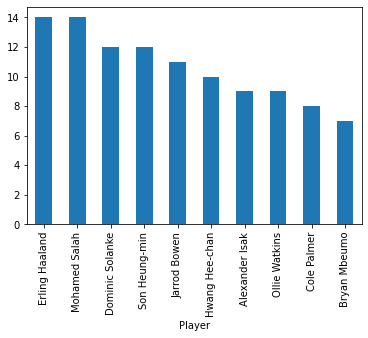

In [89]:
Top_buteur_PL= Epl[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
Top_buteur_PL.groupby('Player')['Gls1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

In [90]:
Top_buteur_PL = Epl.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Les meilleur buteur de la Premiere League est :",Top_buteur_PL)

Les meilleur buteur de la Premiere League est : Player
Erling Haaland    14.0
Name: Gls1, dtype: float64


# meilleurs buteurs sur penalty de la PL

In [91]:
but_sur_penalty_pl = Epl[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_sur_penalty_pl

,Player,Squad,PK
1343,Douglas Luiz,Aston Villa,4
2037,Mohamed Salah,Liverpool,4
1778,Cole Palmer,Chelsea,4
1074,João Pedro,Brighton,4
1484,Bryan Mbeumo,Brentford,3
933,Erling Haaland,Manchester City,3
1037,Alexander Isak,Newcastle Utd,2
1589,Carlton Morris,Luton Town,2
2451,Willian,Fulham,2
2453,Callum Wilson,Newcastle Utd,2


In [92]:
but_sur_penalty_pl = Epl[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:1]
print("Le meilleurs buteurs sur penalty de la pl:", but_sur_penalty_pl)

Le meilleurs buteurs sur penalty de la pl:             Player        Squad  PK
1343  Douglas Luiz  Aston Villa   4


# meilleurs buteurs sans penalty de la PL

In [93]:
but_sans_penalty_pl = Epl[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_pl

,Player,Squad,G-PK1
2179,Dominic Solanke,Bournemouth,11
306,Jarrod Bowen,West Ham,11
933,Erling Haaland,Manchester City,11
989,Son Heung-min,Tottenham,11
2037,Mohamed Salah,Liverpool,10
963,Hwang Hee-chan,Wolves,9
2432,Ollie Watkins,Aston Villa,9
1037,Alexander Isak,Newcastle Utd,7
2466,Chris Wood,Nott'ham Forest,7
1050,Nicolas Jackson,Chelsea,7


In [94]:
but_sans_penalty_pl = Epl[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:1]
print("Le meilleurs buteurs sans penalty de la pl:", but_sans_penalty_pl)

Le meilleurs buteurs sans penalty de la pl:                Player        Squad  G-PK1
2179  Dominic Solanke  Bournemouth     11


# meilleurs passeur de la PL

<AxesSubplot:xlabel='Player'>

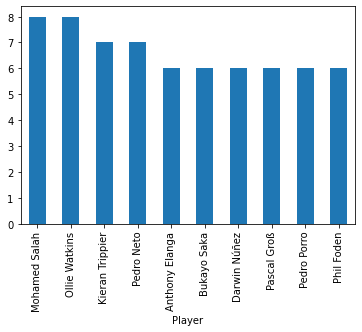

In [95]:
top_assists_pl= Epl[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists_pl.groupby('Player')['Ast1'].sum().sort_values(ascending = False).plot(kind="bar")

In [96]:
top_assists_pl = Epl[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:1]
print("Le meilleurs passeur de la Premiere League :", top_assists_pl)

Le meilleurs passeur de la Premiere League :              Player      Squad  Ast1
2037  Mohamed Salah  Liverpool     8


# Meilleurs buteurs + passeur de PL

In [97]:
top_but_passeur_pl = Epl[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:5]
top_but_passeur_pl

,Player,Squad,Gls1,Ast1,G+A1
2037,Mohamed Salah,Liverpool,14.0,8,22.0
933,Erling Haaland,Manchester City,14.0,4,18.0
2432,Ollie Watkins,Aston Villa,9.0,8,17.0
989,Son Heung-min,Tottenham,12.0,5,17.0
963,Hwang Hee-chan,Wolves,10.0,3,13.0


In [98]:
top_but_passeur_pl = Epl[['Player', 'Squad', 'G+A1']].sort_values(by="G+A1", ascending=False)[:1]
print("Le meilleurs buteurs + passeur de la Premiere League :", top_but_passeur_pl)

Le meilleurs buteurs + passeur de la Premiere League :              Player      Squad  G+A1
2037  Mohamed Salah  Liverpool  22.0


# le meilleur score xG Buts attendus de PL

<AxesSubplot:xlabel='Player'>

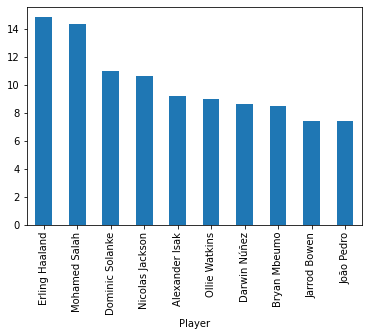

In [99]:
xG_Buts_attendus_pl = Epl[['Player','xG1']].sort_values(by="xG1",ascending = False)[:10]
xG_Buts_attendus_pl.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [100]:
xG_Buts_attendus_pl = Epl[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le joueur avec meilleur score xG Buts attendus de la Premiere League:", xG_Buts_attendus_pl)

Le joueur avec meilleur score xG Buts attendus de la Premiere League:              Player            Squad   xG1
933  Erling Haaland  Manchester City  14.8


# le meilleur score xAG Buts assistés attendus de la Premiere League

<AxesSubplot:xlabel='Player'>

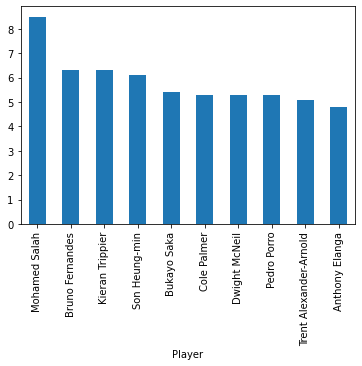

In [101]:
xAG_Buts_assistés_attendus_pl = Epl[['Player','xAG1']].sort_values(by="xAG1",ascending = False)[:10]
xAG_Buts_assistés_attendus_pl.groupby('Player')['xAG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [102]:
xAG_Buts_assistés_attendus_pl = Epl[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le joueur avec meilleur score xG Buts attendus de la Premiere League:", xAG_Buts_assistés_attendus_pl)

Le joueur avec meilleur score xG Buts attendus de la Premiere League:              Player      Squad  xAG1
2037  Mohamed Salah  Liverpool   8.5


# Le joueur qui tente le plus de tir au but  est la de la Premiere League

<AxesSubplot:xlabel='Player'>

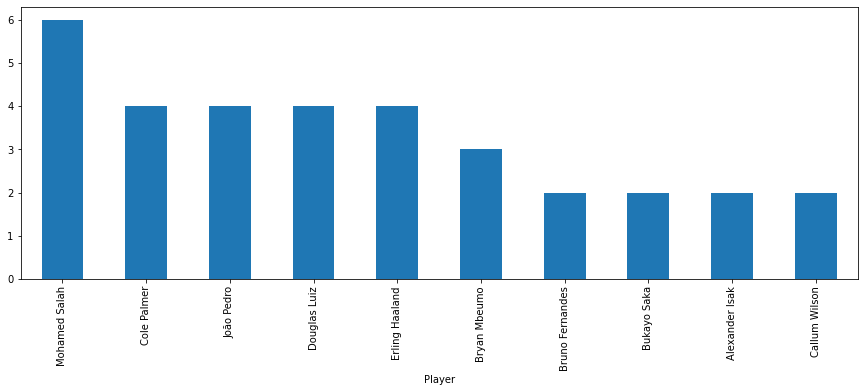

In [103]:
Tantative_tir_but_pl = Epl.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_tir_but_pl.plot(figsize=(15,5),kind="bar")

In [104]:
Tantative_tir_but_pl = Epl.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but  est la de la Premiere League :",Tantative_tir_but_pl)

Le joueur qui tente le plus de tir au but  est la de la Premiere League : Player
Mohamed Salah    6
Name: PKatt, dtype: int64


# Les joueurs de la Premiere League qui jouent plus de minutes 

In [105]:
titulaire_max_pl = Epl[Epl['Min']==Epl['Min'].max()]
titulaire_max_pl

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
86,Joachim Andersen,DEN,DF,Crystal Palace,Premier League,27,20,20,1800,2.0,1,3.0,2,0,0,4,0,1.2,1.4,4
763,Wes Foderingham,ENG,GK,Sheffield Utd,Premier League,32,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
1162,Max Kilman,ENG,DF,Wolves,Premier League,26,20,20,1800,1.0,0,1.0,1,0,0,4,0,0.8,0.6,4
1279,Bernd Leno,GER,GK,Fulham,Premier League,31,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
1732,André Onana,CMR,GK,Manchester Utd,Premier League,27,20,20,1800,0.0,0,0.0,0,0,0,3,0,0.0,0.1,3
1862,Jordan Pickford,ENG,GK,Everton,Premier League,29,20,20,1800,0.0,0,0.0,0,0,0,3,0,0.0,0.1,3
2040,William Saliba,FRA,DF,Arsenal,Premier League,22,20,20,1800,1.0,1,2.0,1,0,0,2,0,1.1,0.1,2
2324,James Trafford,ENG,GK,Burnley,Premier League,21,20,20,1800,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2390,Guglielmo Vicario,ITA,GK,Tottenham,Premier League,27,20,20,1800,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2


In [106]:
print("Les joueurs de la Premiere League qui jouent plus de minutes  :", titulaire_max_pl[['Player','Min']])

Les joueurs de la Premiere League qui jouent plus de minutes  :                  Player   Min
86     Joachim Andersen  1800
763     Wes Foderingham  1800
1162         Max Kilman  1800
1279         Bernd Leno  1800
1732        André Onana  1800
1862    Jordan Pickford  1800
2040     William Saliba  1800
2324     James Trafford  1800
2390  Guglielmo Vicario  1800


# Les joueurs de la Premiere League qui jouent le moins de minutes

In [107]:
titulaire_min_pl = Epl[Epl['Min']==Epl['Min'].min()]
titulaire_min_pl

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
382,Thomas Cannon,IRL,FW,Everton,Premier League,21,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
489,Maxwel Cornet,CIV,MF,West Ham,Premier League,27,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
590,Amadou Diallo,ENG,MF,Newcastle Utd,Premier League,20,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
871,Daniel Gore,ENG,MF,Manchester Utd,Premier League,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1456,Alex Matos,ENG,MF,Chelsea,Premier League,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1488,James Mcatee,ENG,MF,Manchester City,Premier League,21,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1490,James McConnell,ENG,MF,Liverpool,Premier League,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1650,Michael Ndiweni,ENG,FW,Newcastle Utd,Premier League,20,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1681,Rhys Norrington-Davies,WAL,DF,Sheffield Utd,Premier League,24,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1735,Tyler Onyango,ENG,MF,Everton,Premier League,20,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [108]:
print("Les joueurs de la Premiere League qui jouent le moins de minutes  :", titulaire_min_pl[['Player','Min']])

Les joueurs de la Premiere League qui jouent le moins de minutes  :                       Player  Min
382            Thomas Cannon    1
489            Maxwel Cornet    1
590            Amadou Diallo    1
871              Daniel Gore    1
1456              Alex Matos    1
1488            James Mcatee    1
1490         James McConnell    1
1650         Michael Ndiweni    1
1681  Rhys Norrington-Davies    1
1735           Tyler Onyango    1
2308           James Tomkins    1


# Le joueur les plus agressifs de la Premiere League ayant le plus de cartons

In [109]:
Epl[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
1276,Mario Lemina,9,1,10
263,Yves Bissouma,7,2,9
1050,Nicolas Jackson,8,0,8
1775,João Palhinha,8,0,8
2348,Destiny Udogie,7,1,8
69,Edson Álvarez,7,0,7
138,Jordan Ayew,6,1,7
243,Sander Berge,6,1,7
529,Diogo Dalot,6,1,7
739,Bruno Fernandes,7,0,7


In [110]:
Jouer_Agressive_PL = Epl.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons de la Premiere League :",Jouer_Agressive_PL)

Le joueur avec le plus de cartons de la Premiere League : Player
Mario Lemina    10
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive de PL ayant le plus de cartons 

<AxesSubplot:xlabel='Squad'>

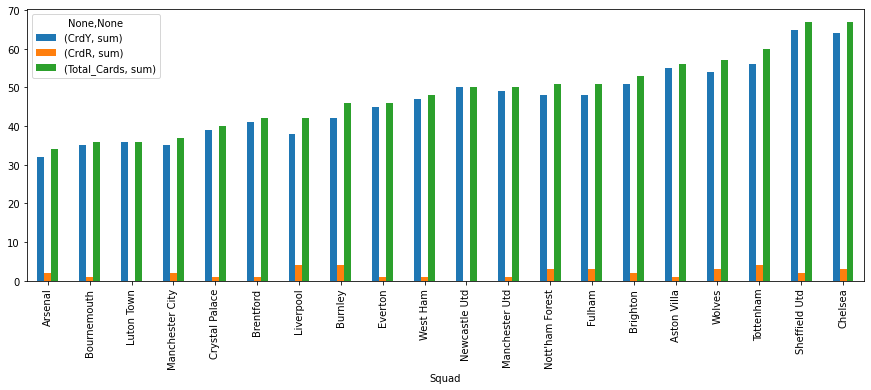

In [111]:
Aggressiv_pl = Epl.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_pl.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [112]:
Aggressiv_Equipe_pl = Epl.groupby('Squad')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de cartons de la Premiere League :",Aggressiv_Equipe_pl)

L'équipe avec le plus de cartons de la Premiere League : Squad
Chelsea    67
Name: Total_Cards, dtype: int64


# Analyse Ligue1

In [113]:
Ligue1 = df.groupby("Comp").get_group('Ligue 1')
Ligue1

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,16,16,1440,3.0,0,3.0,3,0,0,3,0,2.2,0.2,3
4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,23,17,14,1249,0.0,0,0.0,0,0,0,2,0,0.8,0.5,2
5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,17,17,1530,1.0,1,2.0,1,0,0,1,0,0.5,0.9,1
6,Matthis Abline,FRA,FW,Nantes,Ligue 1,20,10,5,420,1.0,0,1.0,1,0,0,0,0,0.8,1.5,0
8,Zakaria Aboukhlal,MAR,"MF,FW",Toulouse,Ligue 1,23,5,4,376,3.0,0,3.0,2,1,1,0,0,2.2,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,Warren Zaire-Emery,FRA,MF,Paris S-G,Ligue 1,17,14,12,1114,2.0,2,4.0,2,0,0,2,0,1.0,0.8,2
2489,Denis Zakaria,SUI,"MF,DF",Monaco,Ligue 1,27,14,13,1175,1.0,0,1.0,1,0,0,6,0,0.8,0.1,6
2504,Mehdi Zeffane,ALG,"DF,MF",Clermont Foot,Ligue 1,31,15,8,643,0.0,0,0.0,0,0,0,2,0,1.2,0.3,2
2511,Nathan Zeze,FRA,DF,Nantes,Ligue 1,18,1,1,90,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

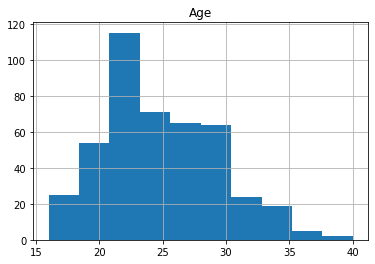

In [114]:
#histogramme de l'âge
Ligue1.hist(column='Age')

# Le Joueur le plus jeune de Ligue 1

In [115]:
#Age minimum en PL
Age_minimum_Ligue1= Ligue1[['Player','Age','Squad']].min()
print("Le Joueur le plus jeune de Ligue 1 :", Age_minimum_Ligue1)

Le Joueur le plus jeune de Ligue 1 : Player    Aaron Malouda
Age                  16
Squad             Brest
dtype: object


# Le Joueur le plus vieux de Ligue 1

In [116]:
#Age maximum en PL
Age_maxi_Ligue1= Ligue1[['Player','Age','Squad']].max()
print("Le Joueur le plus vieux de Ligue 1 :", Age_maxi_Ligue1)

Le Joueur le plus vieux de Ligue 1 : Player    Ângelo Borges
Age                  40
Squad          Toulouse
dtype: object


# La nationalité des joueur de Ligue 1

<AxesSubplot:>

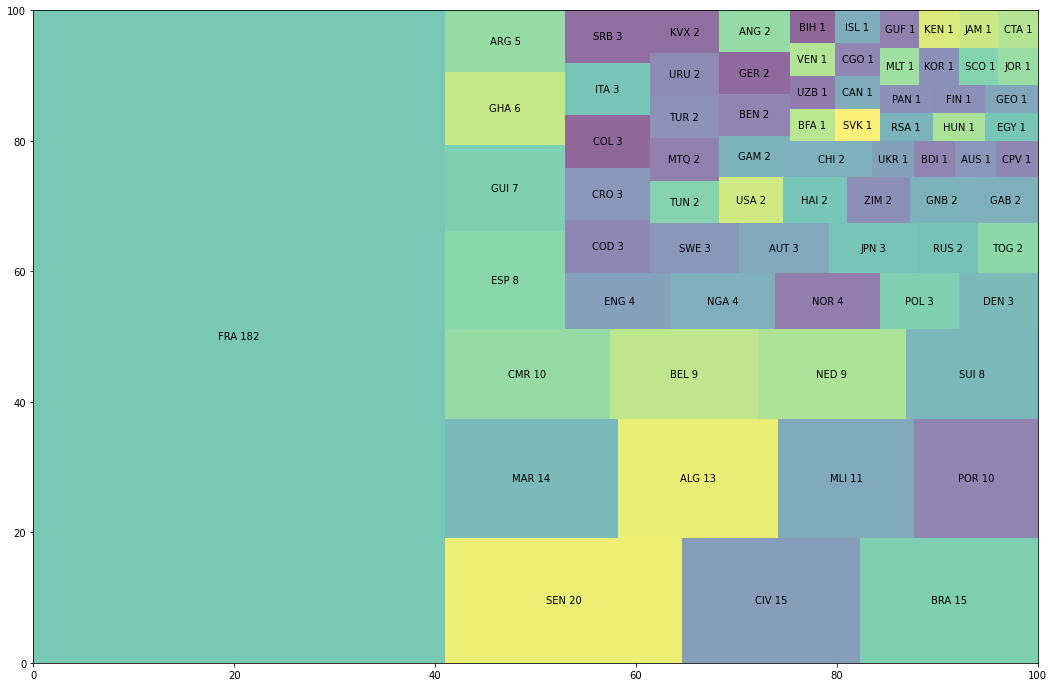

In [117]:
fig = plt.figure(figsize=(18,12))
sizes=Ligue1.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Ligue1.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

# L'équipe avec le plus de joueur de Ligue1

<AxesSubplot:>

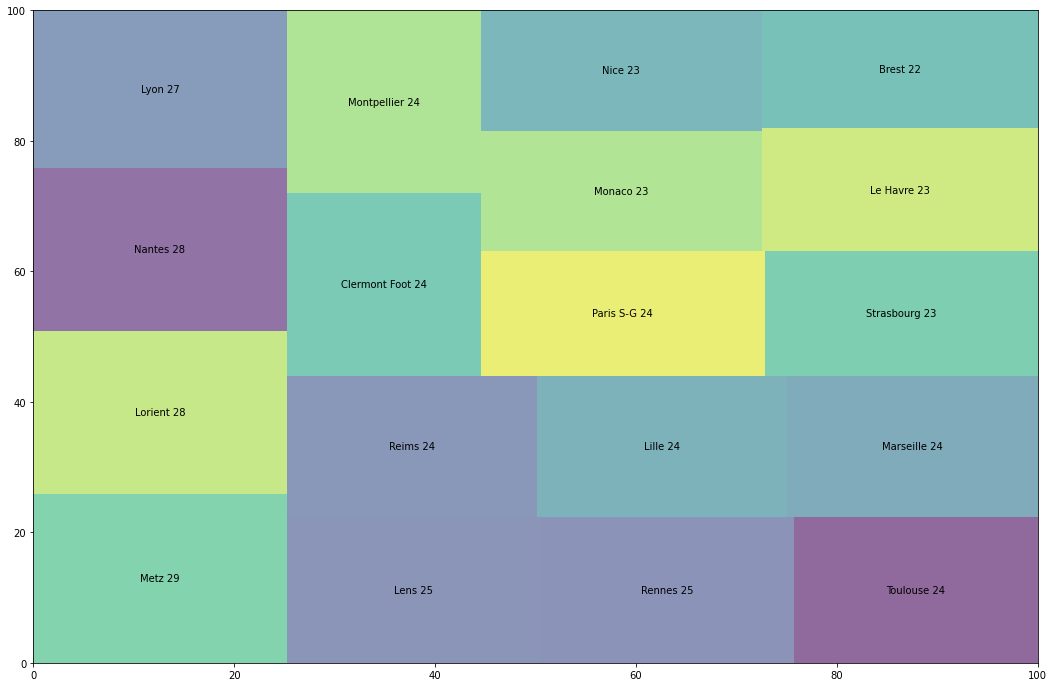

In [118]:
fig = plt.figure(figsize=(18,12))
sizes=Ligue1.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Ligue1.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [119]:
NB_joueurs_equipes_Ligue1 = Ligue1.groupby('Squad',)['Player'].count().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de joueur de Ligue1 :",NB_joueurs_equipes_Ligue1)

L'équipe avec le plus de joueur de Ligue1 : Squad
Metz    29
Name: Player, dtype: int64


# L'équipe qui marque le plus en Ligue1

<AxesSubplot:xlabel='Squad'>

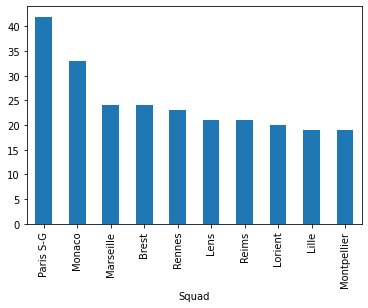

In [120]:
but_Equipe_Ligue1 = Ligue1.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_Equipe_Ligue1.head(10).plot(kind="bar")

In [121]:
but_Equipe_Ligue1 = Ligue1.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Les équipe qui marquent le plus en Ligue1 :", but_Equipe_Ligue1)

Les équipe qui marquent le plus en Ligue1 : Squad
Paris S-G    42.0
Name: Gls1, dtype: float64


# meilleurs buteurs de Ligue1

<AxesSubplot:xlabel='Player'>

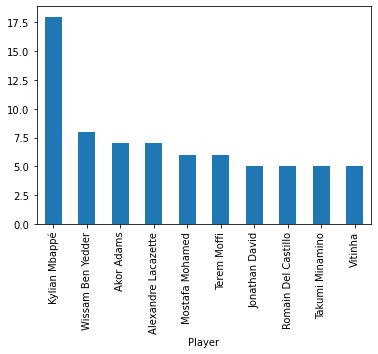

In [122]:
top_but_Ligue1= Ligue1[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
top_but_Ligue1.groupby('Player')['Gls1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

In [123]:
top_but_Ligue1= Ligue1[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:1]
print("Le meilleurs buteurs de Ligue1:", top_but_Ligue1)

Le meilleurs buteurs de Ligue1:              Player      Squad  Gls1
1478  Kylian Mbappé  Paris S-G  18.0


# meilleurs buteurs sur penalty de Ligue1 

In [124]:
but_sur_penalty_Ligue1 = Ligue1[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_sur_penalty_Ligue1

,Player,Squad,PK
1478,Kylian Mbappé,Paris S-G,5
2085,Téji Savanier,Montpellier,3
560,Romain Del Castillo,Brest,3
303,Benjamin Bourigeaud,Rennes,3
1568,Mostafa Mohamed,Nantes,2
2192,Florian Sotoca,Lens,2
1667,Shamar Nicholson,Clermont Foot,1
1567,Terem Moffi,Nice,1
268,Ludovic Blas,Rennes,1
2150,Moses Simon,Nantes,1


In [125]:
but_sur_penalty_Ligue1 = Ligue1[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:1]
print("Le meilleurs buteurs sur penalty de la Ligue1:", but_sur_penalty_Ligue1)

Le meilleurs buteurs sur penalty de la Ligue1:              Player      Squad  PK
1478  Kylian Mbappé  Paris S-G   5


# le meilleurs buteurs sans penalty de la Ligue1 

In [126]:
but_sans_penalty_Ligue1 = Ligue1[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Ligue1

,Player,Squad,G-PK1
1478,Kylian Mbappé,Paris S-G,13
229,Wissam Ben Yedder,Monaco,7
13,Akor Adams,Montpellier,7
1230,Alexandre Lacazette,Lyon,6
1567,Terem Moffi,Nice,5
851,Aleksandr Golovin,Monaco,5
528,Thijs Dallinga,Toulouse,5
654,Kamory Doumbia,Brest,5
2408,Vitinha,Paris S-G,5
720,Romain Faivre,Lorient,5


In [127]:
but_sans_penalty_Ligue1 = Ligue1[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:1]
print("Le meilleurs buteurs sans penalty de la Ligue1:", but_sans_penalty_Ligue1)

Le meilleurs buteurs sans penalty de la Ligue1:              Player      Squad  G-PK1
1478  Kylian Mbappé  Paris S-G     13


# meilleurs passeurs de Ligue1

<AxesSubplot:xlabel='Player'>

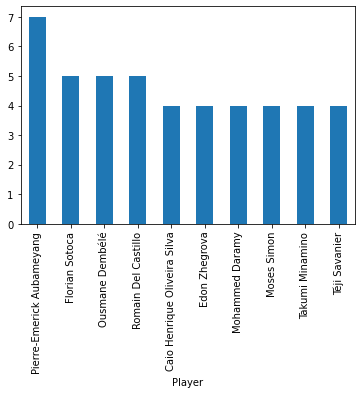

In [128]:
top_assists_Ligue1= Ligue1[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists_Ligue1.groupby('Player')['Ast1'].sum().sort_values(ascending = False).plot(kind="bar")

In [129]:
top_assists_Ligue1= Ligue1[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:1]
print("Le meilleurs passeurs de Ligue1:", top_assists_Ligue1)

Le meilleurs passeurs de Ligue1:                         Player      Squad  Ast1
131  Pierre-Emerick Aubameyang  Marseille     7


# Meilleurs buteurs + passeurs de Ligue1

In [130]:
top_but_passeur_Ligue1 = Ligue1[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:5]
top_but_passeur_Ligue1

,Player,Squad,Gls1,Ast1,G+A1
1478,Kylian Mbappé,Paris S-G,18.0,2,20.0
131,Pierre-Emerick Aubameyang,Marseille,5.0,7,12.0
560,Romain Del Castillo,Brest,5.0,5,10.0
1545,Takumi Minamino,Monaco,5.0,4,9.0
1567,Terem Moffi,Nice,6.0,2,8.0


In [131]:
top_but_passeur_Ligue1= Ligue1[['Player', 'Squad', 'G+A1']].sort_values(by="G+A1", ascending=False)[:1]
print("Le meilleurs passeurs de Ligue1:", top_but_passeur_Ligue1)

Le meilleurs passeurs de Ligue1:              Player      Squad  G+A1
1478  Kylian Mbappé  Paris S-G  20.0


# le meilleur score xG Buts attendus de Ligue1

<AxesSubplot:xlabel='Player'>

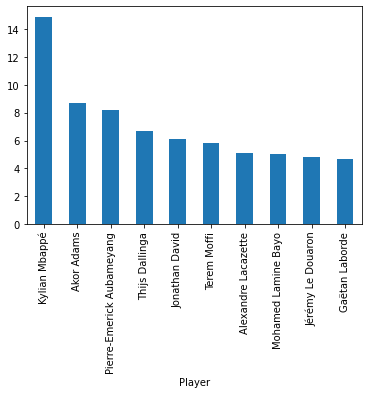

In [132]:
xG_Buts_attendus_Ligue1 = Ligue1[['Player','xG1']].sort_values(by="xG1",ascending = False)[:10]
xG_Buts_attendus_Ligue1.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [133]:
xG_Buts_attendus_Ligue1 = Ligue1[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le joueur avec meilleur score xG Buts attendus de Ligue1:", but_sans_penalty_Ligue1)

Le joueur avec meilleur score xG Buts attendus de Ligue1:              Player      Squad  G-PK1
1478  Kylian Mbappé  Paris S-G     13


# le meilleur score xAG Buts assistés attendus de Ligue1

<AxesSubplot:xlabel='Player'>

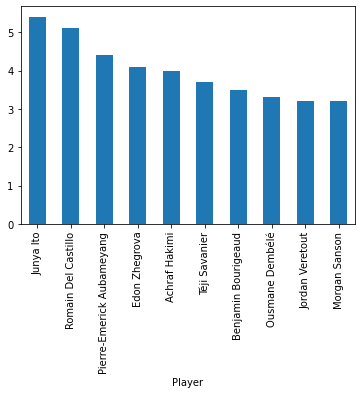

In [134]:
xAG_Buts_assistés_attendus_Ligue1 = Ligue1[['Player','xAG1']].sort_values(by="xAG1",ascending = False)[:10]
xAG_Buts_assistés_attendus_Ligue1.groupby('Player')['xAG1'].sum().sort_values(ascending = False).plot(kind="bar")

In [135]:
xAG_Buts_assistés_attendus_Ligue1 = Ligue1[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le joueur avec meilleur score xAG Buts assistés attendus de Ligue1:", xAG_Buts_assistés_attendus_Ligue1)

Le joueur avec meilleur score xAG Buts assistés attendus de Ligue1:          Player  Squad  xAG1
1046  Junya Ito  Reims   5.4


# Le joueur qui tente le plus de tir au but de Ligue1

<AxesSubplot:xlabel='Player'>

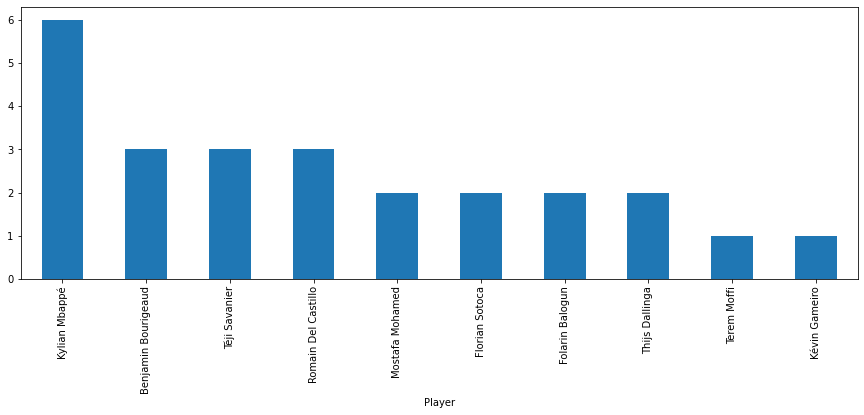

In [136]:
Tantative_tir_but_Ligue1 = Ligue1.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_tir_but_Ligue1.plot(figsize=(15,5),kind="bar")

In [137]:
Tantative_tir_but_Ligue1 = Ligue1.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but de Ligue1 :",Tantative_tir_but_Ligue1)

Le joueur qui tente le plus de tir au but de Ligue1 : Player
Kylian Mbappé    6
Name: PKatt, dtype: int64


# Les joueurs de la Ligue1 qui jouent plus de minutes 

In [138]:
titulaire_max_Ligue1 = Ligue1[Ligue1['Min']==Ligue1['Min'].max()]
titulaire_max_Ligue1

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,17,17,1530,1.0,1,2.0,1,0,0,1,0,0.5,0.9,1
265,Marco Bizot,NED,GK,Brest,Ligue 1,32,17,17,1530,0.0,0,0.0,0,0,0,2,0,0.0,0.1,2
350,Marcin Bułka,POL,GK,Nice,Ligue 1,24,17,17,1530,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
444,Lucas Chevalier,FRA,GK,Lille,Ligue 1,22,17,17,1530,0.0,0,0.0,0,0,0,0,0,0.0,0.1,0
536,Dante,BRA,DF,Nice,Ligue 1,40,17,17,1530,0.0,1,1.0,0,0,0,4,0,0.4,0.3,4
574,Arthur Desmas,FRA,GK,Le Havre,Ligue 1,29,17,17,1530,0.0,0,0.0,0,0,0,1,0,0.0,0.4,1
596,Mory Diaw,SEN,GK,Clermont Foot,Ligue 1,30,17,17,1530,0.0,0,0.0,0,0,0,2,0,0.0,0.1,2
617,Yehvann Diouf,FRA,GK,Reims,Ligue 1,24,17,17,1530,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1176,Philipp Köhn,SUI,GK,Monaco,Ligue 1,25,17,17,1530,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1235,Kenny Lala,FRA,DF,Brest,Ligue 1,32,17,17,1530,1.0,2,3.0,1,0,0,2,0,0.2,1.4,2


In [139]:
print("Les joueurs de la Ligue1 qui jouent plus de minutes  :", titulaire_max_Ligue1[['Player','Squad','Min']])

Les joueurs de la Ligue1 qui jouent plus de minutes  :                  Player          Squad   Min
5       Laurent Abergel        Lorient  1530
265         Marco Bizot          Brest  1530
350        Marcin Bułka           Nice  1530
444     Lucas Chevalier          Lille  1530
536               Dante           Nice  1530
574       Arthur Desmas       Le Havre  1530
596           Mory Diaw  Clermont Foot  1530
617       Yehvann Diouf          Reims  1530
1176       Philipp Köhn         Monaco  1530
1235         Kenny Lala          Brest  1530
1267   Benjamin Lecomte    Montpellier  1530
1309      Bradley Locko          Brest  1530
1397     Steve Mandanda         Rennes  1530
1624         Yvon Mvogo        Lorient  1530
1668  Rasmus Nicolaisen       Toulouse  1530
1946   Guillaume Restes       Toulouse  1530
2048        Brice Samba           Lens  1530
2120          Matz Sels     Strasbourg  1530
2252    Montassar Talbi        Lorient  1530


# Les joueurs de la Ligue1 qui jouent le moins de minutes

In [140]:
titulaire_min_Ligue1 = Ligue1[Ligue1['Min']==Ligue1['Min'].min()]
titulaire_min_Ligue1

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
582,Lamine Diack,SEN,MF,Nantes,Ligue 1,23,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1390,Aaron Malouda,FRA,FW,Lille,Ligue 1,18,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1477,Ethan Mbappé,FRA,MF,Paris S-G,Ligue 1,17,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [141]:
print("Les joueurs de la Ligue1 qui jouent le moins de minutes  :", titulaire_min_Ligue1[['Player','Squad','Min']])

Les joueurs de la Ligue1 qui jouent le moins de minutes  :              Player      Squad  Min
582    Lamine Diack     Nantes    1
1390  Aaron Malouda      Lille    1
1477   Ethan Mbappé  Paris S-G    1


# Les joueurs les plus agressive de Ligue1

In [142]:
Ligue1[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
315,Lilian Brassier,7,1,8
1453,Nemanja Matić,7,0,7
2423,Elye Wahi,6,1,7
422,Maximiliano Caufriez,4,2,6
766,Thomas Foket,6,0,6
851,Aleksandr Golovin,5,1,6
879,Jonathan Gradit,6,0,6
1311,Renan Lodi,6,0,6
1496,Facundo Medina,6,0,6
1649,Rassoul Ndiaye,4,2,6


In [143]:
Jouer_Agressive_Ligue1 = Ligue1.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons de Ligue1 :",Jouer_Agressive_Ligue1)

Le joueur avec le plus de cartons de Ligue1 : Player
Lilian Brassier    8
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive de ligue1

<AxesSubplot:xlabel='Squad'>

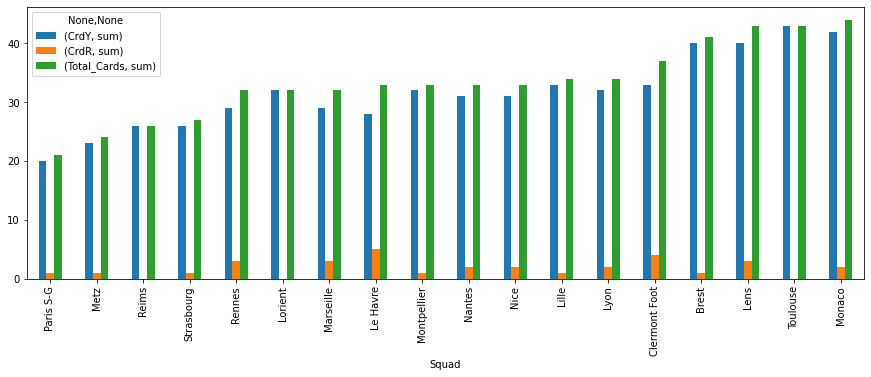

In [144]:
Aggressiv_Ligue1 = Ligue1.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_Ligue1.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [145]:
Aggressiv_Ligue1 = Ligue1.groupby('Squad')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de cartons de la Ligue1 :",Aggressiv_Ligue1)

L'équipe avec le plus de cartons de la Ligue1 : Squad
Monaco    44
Name: Total_Cards, dtype: int64


# Analyse La_Liga

In [146]:
La_Liga = df.groupby("Comp").get_group('La Liga')
La_Liga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
7,Abner,BRA,DF,Betis,La Liga,23,13,9,882,0.0,0,0.0,0,0,0,2,0,0.1,0.4,2
9,Abdel Abqar,MAR,DF,Alavés,La Liga,24,14,14,1254,0.0,0,0.0,0,0,0,5,0,0.3,0.0,5
11,Marcos Acuña,ARG,DF,Sevilla,La Liga,32,8,7,456,0.0,0,0.0,0,0,0,2,0,0.1,0.3,2
32,Joseph Aidoo,GHA,DF,Celta Vigo,La Liga,28,6,4,407,0.0,0,0.0,0,0,0,0,0,0.1,0.1,0
41,Ilias Akhomach,ESP,"MF,FW",Villarreal,La Liga,19,15,5,649,0.0,2,2.0,0,0,0,3,0,0.8,0.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Arsen Zakharyan,RUS,"MF,FW",Real Sociedad,La Liga,20,12,4,415,0.0,1,1.0,0,0,0,0,0,0.4,1.1,0
2491,Joseba Zaldúa,ESP,"DF,MF",Cádiz,La Liga,31,4,2,190,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
2501,Bryan Zaragoza,ESP,"MF,FW",Granada,La Liga,22,18,15,1379,6.0,2,8.0,5,1,1,5,0,3.6,3.0,5
2523,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,26,18,17,1499,0.0,1,1.0,0,0,0,7,0,0.3,0.7,7


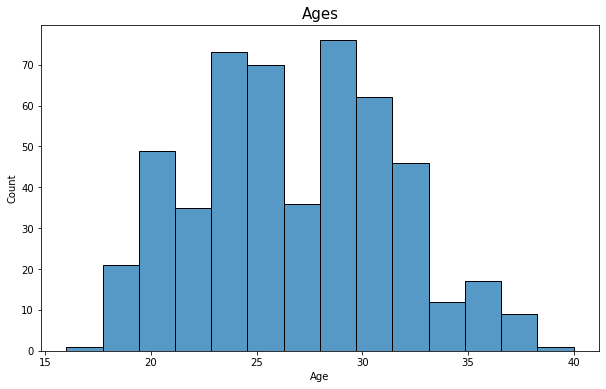

In [147]:
plt.figure(figsize=(10,6))
sns.histplot(La_Liga["Age"])
plt.title("Ages", size=15)
plt.show()

In [148]:
#Age minimum en Liga
Age_min_Liga= La_Liga[['Player','Age','Squad']].min()
print("Le Joueur le plus jeune de Liga :", Age_min_Liga)

Le Joueur le plus jeune de Liga : Player    Abdel Abqar
Age                16
Squad          Alavés
dtype: object


In [149]:
#Age minimum en Liga
Age_max_Liga= La_Liga[['Player','Age','Squad']].max()
print("Le Joueur le plus vieux de Liga :", Age_max_Liga)

Le Joueur le plus vieux de Liga : Player    İlkay Gündoğan
Age                   40
Squad         Villarreal
dtype: object


# La nationalité des joueur de Liga

<AxesSubplot:>

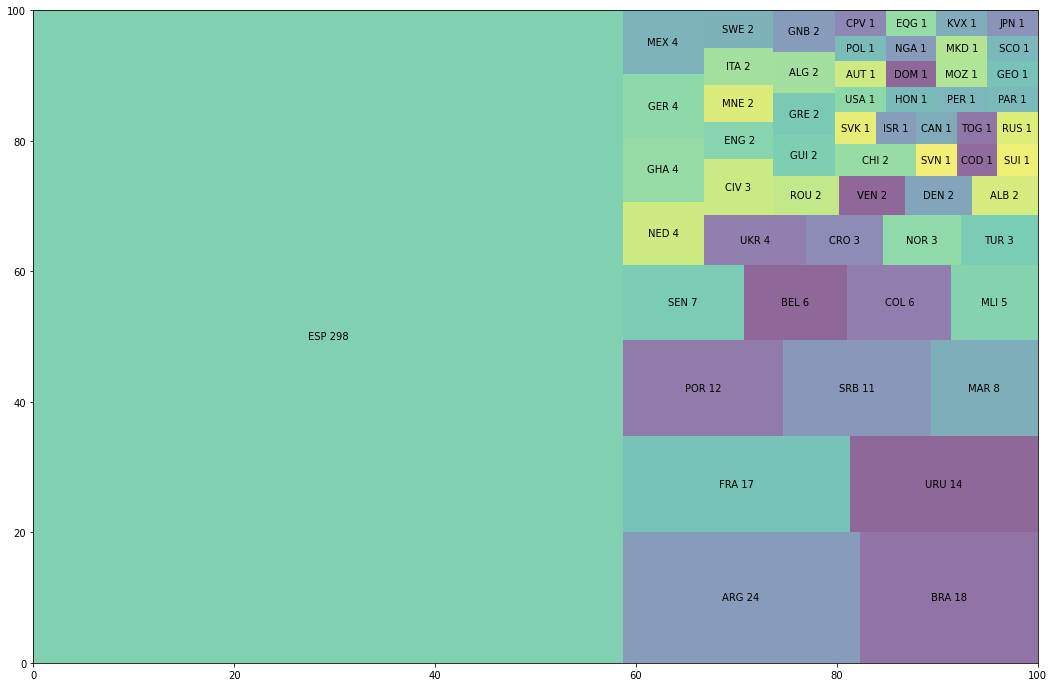

In [150]:
fig = plt.figure(figsize=(18,12))
sizes=La_Liga.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=La_Liga.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

# L'équipe avec le plus de joueur de Liga

<AxesSubplot:>

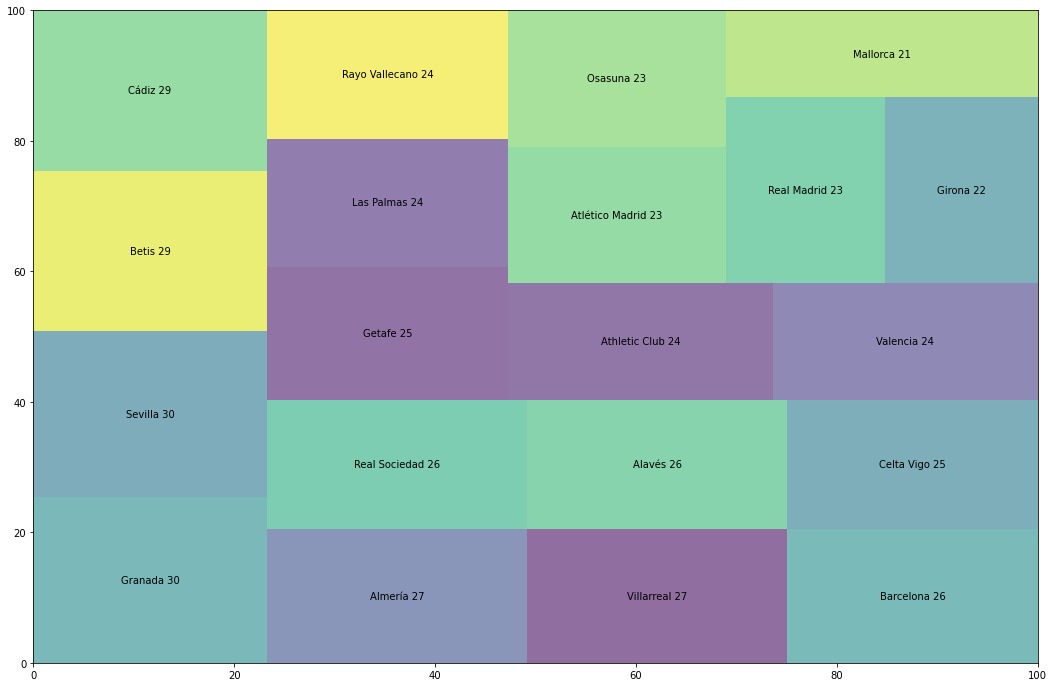

In [151]:
fig = plt.figure(figsize=(18,12))
sizes=La_Liga.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=La_Liga.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [152]:
NB_joueurs_equipes_La_Liga = La_Liga.groupby('Squad',)['Player'].count().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de joueur de La_Liga :",NB_joueurs_equipes_La_Liga)

L'équipe avec le plus de joueur de La_Liga : Squad
Granada    30
Name: Player, dtype: int64


# L'équipe qui marque le plus en Liga

<AxesSubplot:xlabel='Squad'>

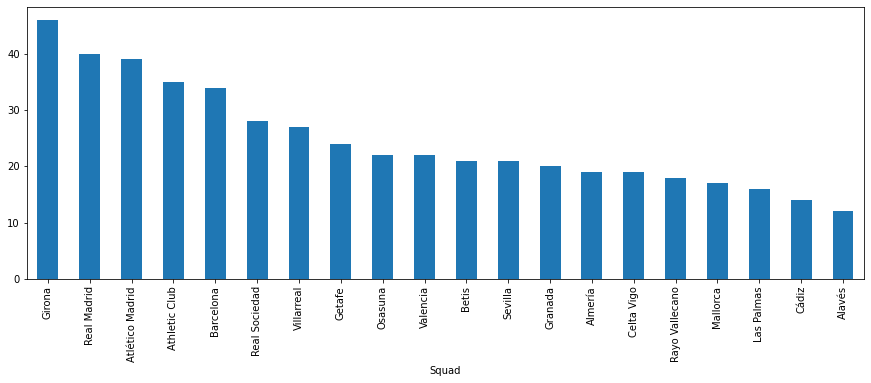

In [153]:
but_Equipe_liga = La_Liga.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_Equipe_liga.plot(figsize=(15,5),kind="bar")

In [154]:
but_Equipe_liga= La_Liga.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("L'équipe qui marque le plus en Liga:", but_Equipe_liga)

L'équipe qui marque le plus en Liga: Squad
Girona    46.0
Name: Gls1, dtype: float64


# Meilleur buteurs de liga 

<AxesSubplot:xlabel='Player'>

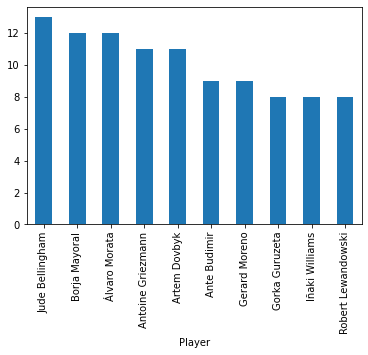

In [155]:
top_but_liga= La_Liga[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
top_but_liga.groupby('Player')['Gls1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

In [156]:
top_but_liga= La_Liga.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs de liga est :", top_but_liga)

Le meilleur buteurs de liga est : Player
Jude Bellingham    13.0
Name: Gls1, dtype: float64


# Le meilleur buteurs sur penalty de liga 

In [157]:
but_sur_penalty_La_Liga= La_Liga[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_sur_penalty_La_Liga

,Player,Squad,PK
2375,José Luis García Vayá,Valencia,4
1469,Borja Mayoral,Getafe,4
890,Antoine Griezmann,Atlético Madrid,3
656,Artem Dovbyk,Girona,3
334,Ante Budimir,Osasuna,3
2360,Myrto Uzuni,Granada,2
1285,Robert Lewandowski,Barcelona,2
2389,Mikel Vesga,Athletic Club,2
2395,Jonathan Viera,Las Palmas,2
1586,Gerard Moreno,Villarreal,2


In [158]:
but_sur_penalty_La_Liga= La_Liga.groupby('Player')['PK'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs sur penalty de liga est :", but_sur_penalty_La_Liga)

Le meilleur buteurs sur penalty de liga est : Player
José Luis García Vayá    4
Name: PK, dtype: int64


# Le meilleur buteur sans penalty de liga

In [159]:
but_sans_penalty_La_Liga = La_Liga[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_La_Liga

,Player,Squad,G-PK1
222,Jude Bellingham,Real Madrid,13
1581,Álvaro Morata,Atlético Madrid,12
890,Antoine Griezmann,Atlético Madrid,8
656,Artem Dovbyk,Girona,8
926,Gorka Guruzeta,Athletic Club,8
1469,Borja Mayoral,Getafe,8
2448,Iñaki Williams,Athletic Club,8
2224,Jørgen Strand Larsen,Celta Vigo,7
1586,Gerard Moreno,Villarreal,7
672,Hugo Duro,Valencia,7


In [160]:
but_sans_penalty_La_Liga = La_Liga.groupby('Player')['G-PK1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteur sans penalty de liga est :", but_sans_penalty_La_Liga)

Le meilleur buteur sans penalty de liga est : Player
Jude Bellingham    13
Name: G-PK1, dtype: int64


# Meilleur passeurs de liga 

<AxesSubplot:xlabel='Player'>

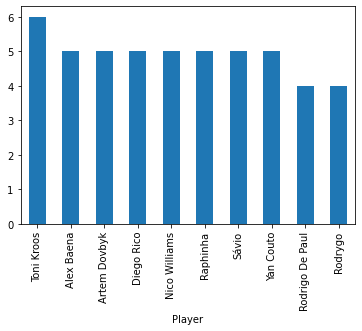

In [161]:
top_passeur_Liga = La_Liga[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_passeur_Liga.groupby('Player')['Ast1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

In [162]:
top_passeur_Liga = La_Liga.groupby('Player')['Ast1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur passeur de liga est :", top_passeur_Liga)

Le meilleur passeur de liga est : Player
Toni Kroos    6
Name: Ast1, dtype: int64


# Meilleurs buteurs + passeur de liga

In [163]:
top_but_passeur_liga = La_Liga[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_liga

,Player,Squad,Gls1,Ast1,G+A1
656,Artem Dovbyk,Girona,11.0,5,16.0
222,Jude Bellingham,Real Madrid,13.0,2,15.0
890,Antoine Griezmann,Atlético Madrid,11.0,3,14.0
1469,Borja Mayoral,Getafe,12.0,1,13.0
1581,Álvaro Morata,Atlético Madrid,12.0,1,13.0
1285,Robert Lewandowski,Barcelona,8.0,4,12.0
1989,Rodrygo,Real Madrid,7.0,4,11.0
2448,Iñaki Williams,Athletic Club,8.0,3,11.0
1586,Gerard Moreno,Villarreal,9.0,2,11.0
334,Ante Budimir,Osasuna,9.0,2,11.0


In [164]:
top_but_passeur_liga = La_Liga[['Player','Squad','G+A1']].sort_values(by="G+A1",ascending = False)[:1]
print("Le meilleur buteurs + passeur de liga est :", top_but_passeur_liga)

Le meilleur buteurs + passeur de liga est :            Player   Squad  G+A1
656  Artem Dovbyk  Girona  16.0


# Meilleur buteurs sans penalty de liga 

<AxesSubplot:ylabel='Player'>

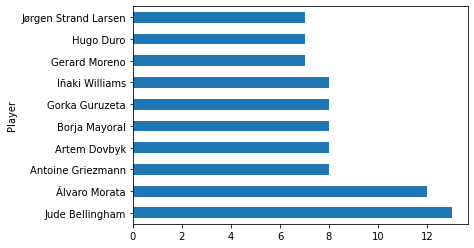

In [165]:
but_sans_penalty_La_Liga = La_Liga[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_La_Liga.groupby('Player')['G-PK1'].sum().sort_values(ascending = False).plot(kind="barh")

In [166]:
but_sans_penalty_La_Liga = La_Liga[['Player','Squad','G-PK1']].sort_values(by="G-PK1",ascending = False)[:1]
print("Le meilleur buteurs sans penalty de liga est :", but_sans_penalty_La_Liga)

Le meilleur buteurs sans penalty de liga est :               Player        Squad  G-PK1
222  Jude Bellingham  Real Madrid     13


# xG Buts attendus en liga

<AxesSubplot:ylabel='Player'>

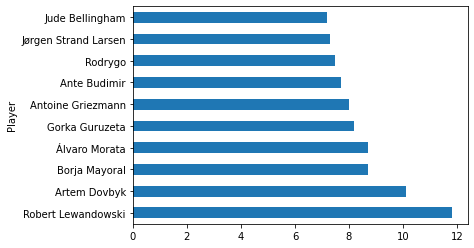

In [167]:
xG_Buts_attendus_liga = La_Liga[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_liga.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="barh")

In [168]:
xG_Buts_attendus_liga = La_Liga[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en liga est :", xG_Buts_attendus_liga)

Le meilleur score xG Buts attendus en liga est :                   Player      Squad   xG1
1285  Robert Lewandowski  Barcelona  11.8


# le meilleur score xAG Buts assistés attendus de Liga

In [169]:
xAG_Buts_assistés_attendus_liga = La_Liga[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_liga

,Player,Squad,xAG1
124,Iago Aspas,Celta Vigo,5.4
2448,Iñaki Williams,Athletic Club,5.0
1913,Largie Ramazani,Almería,4.7
1040,Isco,Betis,4.6
923,İlkay Gündoğan,Barcelona,4.5
2087,Sávio,Girona,4.4
1926,Raphinha,Barcelona,4.0
538,Sergi Darder,Mallorca,3.9
1303,Marcos Llorente,Atlético Madrid,3.9
152,Alex Baena,Villarreal,3.8


In [170]:
xAG_Buts_assistés_attendus_liga = La_Liga[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en liga est :", xAG_Buts_assistés_attendus_liga)

Le meilleur score xG Buts attendus en liga est :          Player       Squad  xAG1
124  Iago Aspas  Celta Vigo   5.4


# Le joueur qui tente le plus de tir au but de La_Liga 

<AxesSubplot:xlabel='Player'>

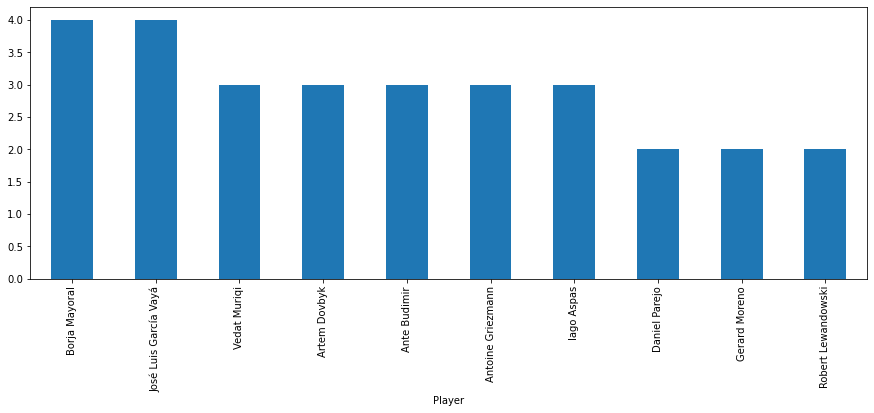

In [171]:
Tantative_tir_but_La_Liga = La_Liga.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_tir_but_La_Liga.plot(figsize=(15,5),kind="bar")

In [172]:
Tantative_tir_but_La_Liga = La_Liga.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but de La_Liga :",Tantative_tir_but_La_Liga)

Le joueur qui tente le plus de tir au but de La_Liga : Player
Borja Mayoral    4
Name: PKatt, dtype: int64


# Les joueurs de La_Liga qui jouent plus de minutes

In [173]:
titulaire_max_La_Liga = La_Liga[La_Liga['Min']==La_Liga['Min'].max()]
titulaire_max_La_Liga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
609,Stole Dimitrievski,MKD,GK,Rayo Vallecano,La Liga,30,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
804,Aleix García,ESP,MF,Girona,La Liga,26,19,19,1710,3.0,4,7.0,3,0,0,2,0,1.1,3.0,2
825,Paulo Gazzaniga,ARG,GK,Girona,La Liga,32,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.7,2
1102,Filip Jørgensen,DEN,GK,Villarreal,La Liga,21,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1391,Giorgi Mamardashvili,GEO,GK,Valencia,La Liga,23,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1702,Jan Oblak,SVN,GK,Atlético Madrid,La Liga,31,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1909,Predrag Rajković,SRB,GK,Mallorca,La Liga,28,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2151,Unai Simón,ESP,GK,Athletic Club,La Liga,26,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
2160,Antonio Sivera,ESP,GK,Alavés,La Liga,27,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.1,2
2187,David Soria,ESP,GK,Getafe,La Liga,30,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2


In [174]:
print("Les joueurs de La_Liga qui jouent plus de minutes  :", titulaire_max_La_Liga[['Player','Squad','Min']])

Les joueurs de La_Liga qui jouent plus de minutes  :                     Player            Squad   Min
609     Stole Dimitrievski   Rayo Vallecano  1710
804           Aleix García           Girona  1710
825        Paulo Gazzaniga           Girona  1710
1102       Filip Jørgensen       Villarreal  1710
1391  Giorgi Mamardashvili         Valencia  1710
1702             Jan Oblak  Atlético Madrid  1710
1909      Predrag Rajković         Mallorca  1710
2151            Unai Simón    Athletic Club  1710
2160        Antonio Sivera           Alavés  1710
2187           David Soria           Getafe  1710
2366         Álvaro Vallés       Las Palmas  1710


# Les joueurs de La_Liga qui jouent le moins de minutes

In [175]:
titulaire_min_La_Liga = La_Liga[La_Liga['Min']==La_Liga['Min'].max()]
titulaire_min_La_Liga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
609,Stole Dimitrievski,MKD,GK,Rayo Vallecano,La Liga,30,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
804,Aleix García,ESP,MF,Girona,La Liga,26,19,19,1710,3.0,4,7.0,3,0,0,2,0,1.1,3.0,2
825,Paulo Gazzaniga,ARG,GK,Girona,La Liga,32,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.7,2
1102,Filip Jørgensen,DEN,GK,Villarreal,La Liga,21,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1391,Giorgi Mamardashvili,GEO,GK,Valencia,La Liga,23,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1702,Jan Oblak,SVN,GK,Atlético Madrid,La Liga,31,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1909,Predrag Rajković,SRB,GK,Mallorca,La Liga,28,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2151,Unai Simón,ESP,GK,Athletic Club,La Liga,26,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
2160,Antonio Sivera,ESP,GK,Alavés,La Liga,27,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.1,2
2187,David Soria,ESP,GK,Getafe,La Liga,30,19,19,1710,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2


In [176]:
print("Les joueurs de La_Liga qui jouent le moins de minutes  :", titulaire_min_La_Liga[['Player','Squad','Min']])

Les joueurs de La_Liga qui jouent le moins de minutes  :                     Player            Squad   Min
609     Stole Dimitrievski   Rayo Vallecano  1710
804           Aleix García           Girona  1710
825        Paulo Gazzaniga           Girona  1710
1102       Filip Jørgensen       Villarreal  1710
1391  Giorgi Mamardashvili         Valencia  1710
1702             Jan Oblak  Atlético Madrid  1710
1909      Predrag Rajković         Mallorca  1710
2151            Unai Simón    Athletic Club  1710
2160        Antonio Sivera           Alavés  1710
2187           David Soria           Getafe  1710
2366         Álvaro Vallés       Las Palmas  1710


# Les joueurs les plus agressive de Liga

In [177]:
La_Liga[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
54,Iván Alejo,10,0,10
619,Djené,9,1,10
52,Rubén Alcaraz,9,0,9
921,Gerard Gumbau,9,0,9
396,Sergi Cardona,8,0,8
723,Fali,8,0,8
1449,Jaime Mata,7,1,8
2229,Damián Suárez,7,1,8
421,Catena,6,1,7
662,Domingos Duarte,5,2,7


In [178]:
Jouer_Agressive_Ligua = La_Liga.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons de Liga :",Jouer_Agressive_Ligua)

Le joueur avec le plus de cartons de Liga : Player
Iván Alejo    10
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive de liga

<AxesSubplot:xlabel='Squad'>

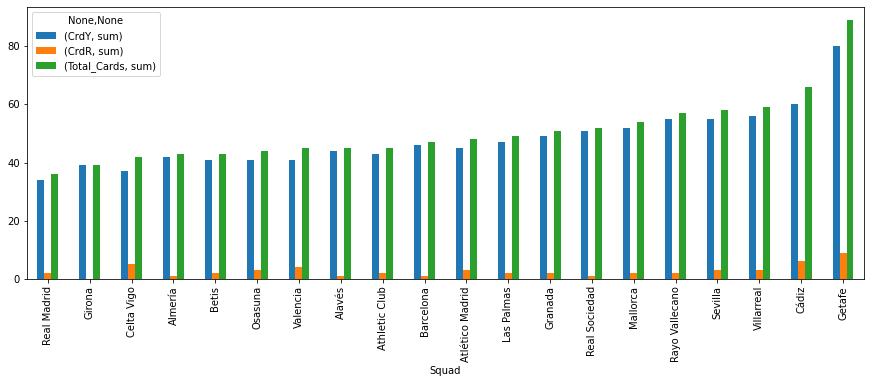

In [179]:
Equipe_agressif_liga = La_Liga.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Equipe_agressif_liga.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [180]:
Aggressiv_Ligua = La_Liga.groupby('Squad')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de cartons de la Liga :",Aggressiv_Ligua)

L'équipe avec le plus de cartons de la Liga : Squad
Getafe    89
Name: Total_Cards, dtype: int64


# Analyse Bundesliga

In [181]:
Bundesliga = df.groupby("Comp").get_group('Bundesliga')
Bundesliga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
1,Brenden Aaronson,USA,MF,Union Berlin,Bundesliga,23,11,4,327,0.0,0,0.0,0,0,0,2,1,0.1,0.3,3
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,7,1,101,0.0,1,1.0,0,0,0,0,0,0.1,0.1,0
14,Junior Adamu,AUT,"FW,MF",Freiburg,Bundesliga,22,12,0,95,0.0,0,0.0,0,0,0,0,0,0.1,0.1,0
15,Sargis Adamyan,ARM,"FW,MF",Köln,Bundesliga,30,5,0,142,0.0,1,1.0,0,0,0,1,0,0.9,0.5,1
18,Karim Adeyemi,GER,"FW,MF",Dortmund,Bundesliga,21,11,3,370,0.0,1,1.0,0,0,0,2,0,0.8,0.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,Robin Zentner,GER,GK,Mainz 05,Bundesliga,29,12,12,1080,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
2509,Cedric Zesiger,SUI,DF,Wolfsburg,Bundesliga,25,13,11,936,0.0,0,0.0,0,0,0,4,0,0.9,0.0,4
2510,Michael Zetterer,GER,GK,Werder Bremen,Bundesliga,28,9,9,810,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2515,Christoph Zimmermann,GER,DF,Darmstadt 98,Bundesliga,30,6,5,441,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


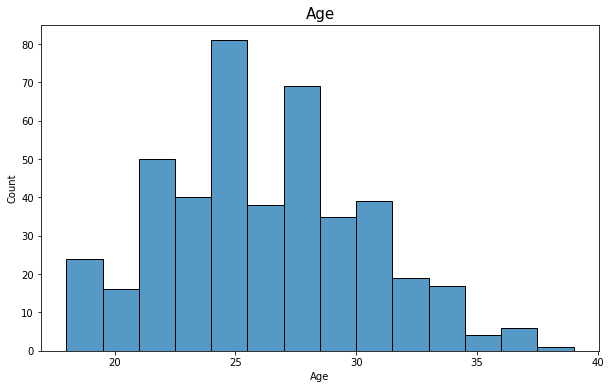

In [182]:
#Age
plt.figure(figsize=(10,6))
sns.histplot(Bundesliga["Age"])
plt.title("Age", size=15)
plt.show()

In [183]:
#Age minimum en Liga
Age_min_Bundesliga= Bundesliga[['Player','Age','Squad']].min()
print("Le Joueur le plus jeune de Bundesliga :", Age_min_Bundesliga)

Le Joueur le plus jeune de Bundesliga : Player    Aaron Seydel
Age                 18
Squad         Augsburg
dtype: object


In [184]:
#Age minimum en Liga
Age_max_Bundesliga= Bundesliga[['Player','Age','Squad']].max()
print("Le Joueur le plus vieux de Bundesliga :", Age_max_Bundesliga)

Le Joueur le plus vieux de Bundesliga : Player    Álex Grimaldo
Age                  39
Squad         Wolfsburg
dtype: object


# La nationalité des joueur de Bundesliga

<AxesSubplot:>

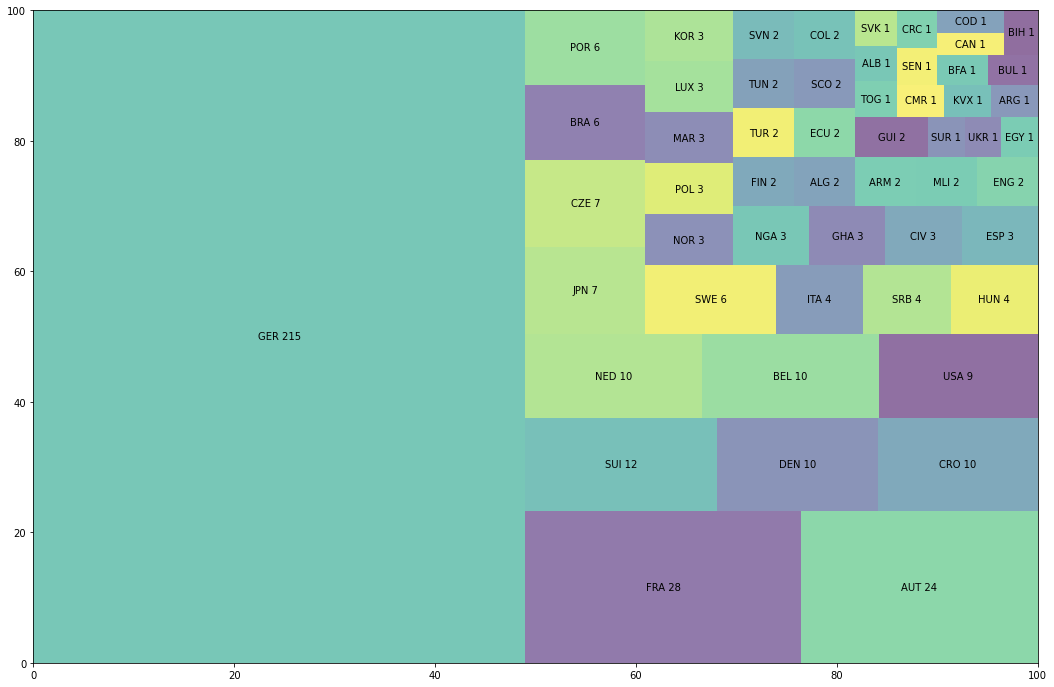

In [185]:
fig = plt.figure(figsize=(18,12))
sizes=Bundesliga.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Bundesliga.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

# L'équipe avec le plus de joueur de Liga

<AxesSubplot:>

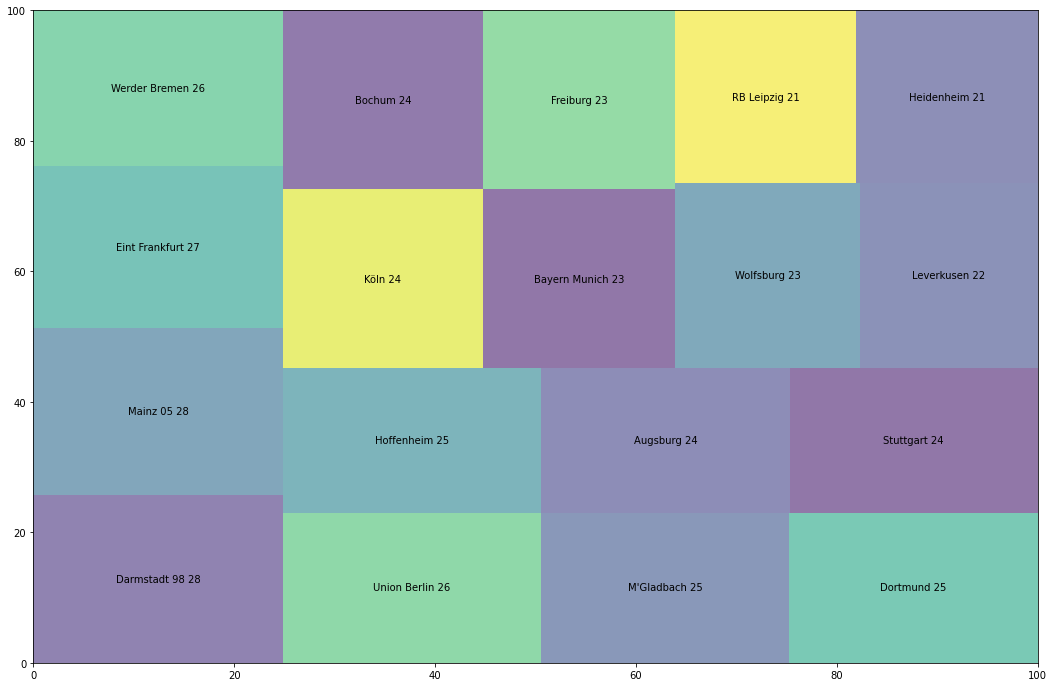

In [186]:
fig = plt.figure(figsize=(18,12))
sizes=Bundesliga.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Bundesliga.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [187]:
NB_joueurs_equipes_Bundesliga = Bundesliga.groupby('Squad',)['Player'].count().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de joueur de Bundesliga :",NB_joueurs_equipes_Bundesliga)

L'équipe avec le plus de joueur de Bundesliga : Squad
Darmstadt 98    28
Name: Player, dtype: int64


# l'équipe qui a marquer le plus de but en Bundesliga

<AxesSubplot:xlabel='Squad'>

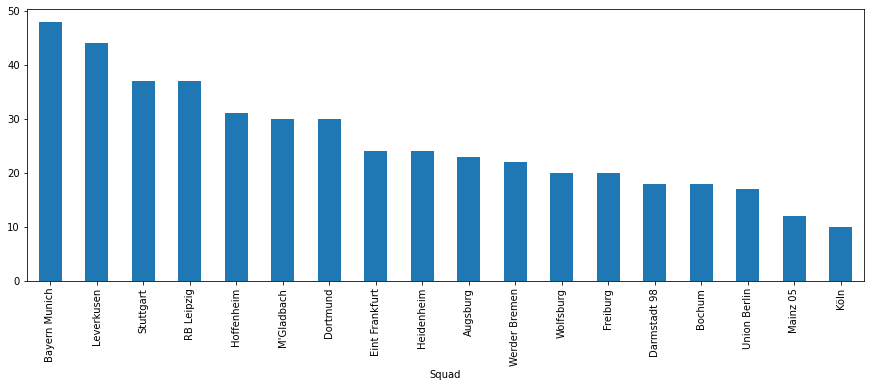

In [188]:
but_Equipe_Bundesliga = Bundesliga.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_Equipe_Bundesliga.plot(figsize=(15,5),kind="bar")

In [189]:
but_Equipe_Bundesliga = Bundesliga.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("L'équipe qui marque le plus en Bundesliga:", but_Equipe_Bundesliga)

L'équipe qui marque le plus en Bundesliga: Squad
Bayern Munich    48.0
Name: Gls1, dtype: float64


# Meilleur buteur de Bundesliga

In [190]:
top_but_Bundesliga = Bundesliga.groupby(['Player', 'Squad'])['Gls1'].sum().sort_values(ascending = False).head(10).reset_index()
top_but_Bundesliga

,Player,Squad,Gls1
0,Harry Kane,Bayern Munich,21.0
1,Serhou Guirassy,Stuttgart,17.0
2,Loïs Openda,RB Leipzig,11.0
3,Victor Boniface,Leverkusen,10.0
4,Deniz Undav,Stuttgart,9.0
5,Jonas Wind,Wolfsburg,9.0
6,Ermedin Demirović,Augsburg,8.0
7,Leroy Sané,Bayern Munich,8.0
8,Álex Grimaldo,Leverkusen,7.0
9,Omar Marmoush,Eint Frankfurt,7.0


In [191]:
top_but_Bundesliga= Bundesliga.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs de Bundesliga est :", top_but_Bundesliga)

Le meilleur buteurs de Bundesliga est : Player
Harry Kane    21.0
Name: Gls1, dtype: float64


# Meilleur buteur sur penalty Bundesliga

<AxesSubplot:xlabel='Player'>

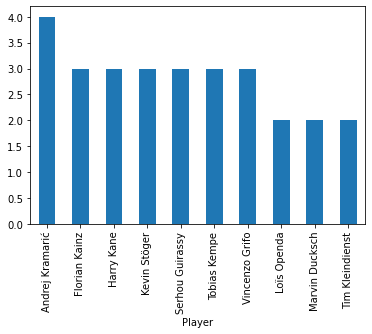

In [192]:
but_sur_penalty_Bundesliga = Bundesliga[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_sur_penalty_Bundesliga.groupby('Player')['PK'].sum().sort_values(ascending = False).plot(kind="bar")

In [193]:
but_sur_penalty_Bundesliga = Bundesliga.groupby('Player')['PK'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteur sur penalty de Bundesliga est :", but_sur_penalty_Bundesliga)

Le meilleur buteur sur penalty de Bundesliga est : Player
Andrej Kramarić    4
Name: PK, dtype: int64


# Meilleur buteur sans penalty Bundesliga

<AxesSubplot:xlabel='Player'>

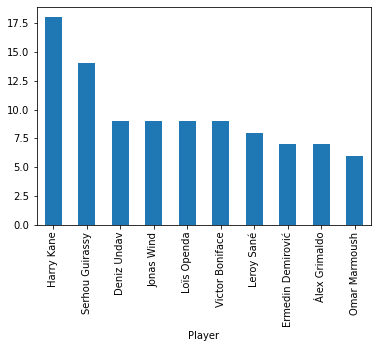

In [194]:
but_sans_penalty_Bundesliga = Bundesliga[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Bundesliga.groupby('Player')['G-PK1'].sum().sort_values(ascending = False).plot(kind="bar")

In [195]:
but_sans_penalty_Bundesliga = Bundesliga.groupby('Player')['G-PK1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteur sans penalty de Bundesliga est :", but_sans_penalty_Bundesliga)

Le meilleur buteur sans penalty de Bundesliga est : Player
Harry Kane    18
Name: G-PK1, dtype: int64


# Meilleur passeur de Bundesliga

<AxesSubplot:xlabel='Player'>

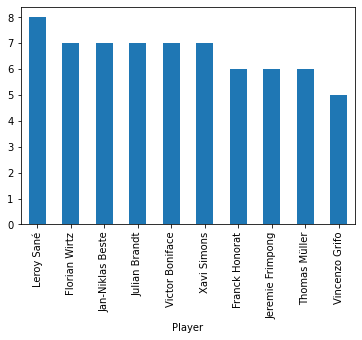

In [196]:
top_passeur_Bundesliga = Bundesliga[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_passeur_Bundesliga.groupby('Player')['Ast1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

In [197]:
top_passeur_Bundesliga = Bundesliga.groupby('Player')['Ast1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur passeur de Bundesliga est :", top_passeur_Bundesliga)

Le meilleur passeur de Bundesliga est : Player
Leroy Sané    8
Name: Ast1, dtype: int64


# meilleurs buteurs + passeur de Bundesliga

In [198]:
top_but_passeur_Bundesliga= Bundesliga[['Player', 'Squad','Gls1', 'Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_Bundesliga

,Player,Squad,Gls1,Ast1,G+A1
1128,Harry Kane,Bayern Munich,21.0,5,26.0
918,Serhou Guirassy,Stuttgart,17.0,1,18.0
286,Victor Boniface,Leverkusen,10.0,7,17.0
2067,Leroy Sané,Bayern Munich,8.0,8,16.0
1737,Loïs Openda,RB Leipzig,11.0,4,15.0
2457,Jonas Wind,Wolfsburg,9.0,4,13.0
568,Ermedin Demirović,Augsburg,8.0,5,13.0
2356,Deniz Undav,Stuttgart,9.0,3,12.0
893,Álex Grimaldo,Leverkusen,7.0,5,12.0
313,Julian Brandt,Dortmund,5.0,7,12.0


In [199]:
top_but_passeur_Bundesliga = Bundesliga.groupby('Player')['G+A1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs + passeur de Bundesliga est :", top_but_passeur_Bundesliga)

Le meilleur buteurs + passeur de Bundesliga est : Player
Harry Kane    26.0
Name: G+A1, dtype: float64


# Le meilleur score xG Buts attendus de Bundesliga

<AxesSubplot:ylabel='Player'>

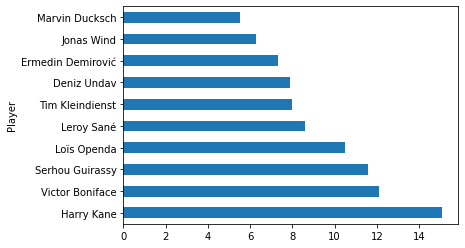

In [200]:
xG_Buts_attendus_Bundesliga = Bundesliga[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_Bundesliga.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="barh")

In [201]:
xG_Buts_attendus_Bundesliga = Bundesliga[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en liga est :", xG_Buts_attendus_Bundesliga)

Le meilleur score xG Buts attendus en liga est :           Player          Squad   xG1
1128  Harry Kane  Bayern Munich  15.1


# Le meilleur score xAG Buts assisté de Bundesliga

In [202]:
xAG_Buts_assistés_attendus_Bundesliga = Bundesliga[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_Bundesliga

,Player,Squad,xAG1
2067,Leroy Sané,Bayern Munich,8.1
313,Julian Brandt,Dortmund,6.5
1005,Franck Honorat,M'Gladbach,5.2
1128,Harry Kane,Bayern Munich,4.9
786,Chris Führich,Stuttgart,4.9
998,Jonas Hofmann,Leverkusen,4.7
1607,Thomas Müller,Bayern Munich,4.4
2458,Florian Wirtz,Leverkusen,4.0
891,Vincenzo Grifo,Freiburg,3.7
784,Jeremie Frimpong,Leverkusen,3.6


In [203]:
xAG_Buts_assistés_attendus_Bundesliga = Bundesliga[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en liga est :", xAG_Buts_assistés_attendus_Bundesliga)

Le meilleur score xG Buts attendus en liga est :           Player          Squad  xAG1
2067  Leroy Sané  Bayern Munich   8.1


# Le joueur qui tente le plus de tir au but de Bundesliga 

<AxesSubplot:xlabel='Player'>

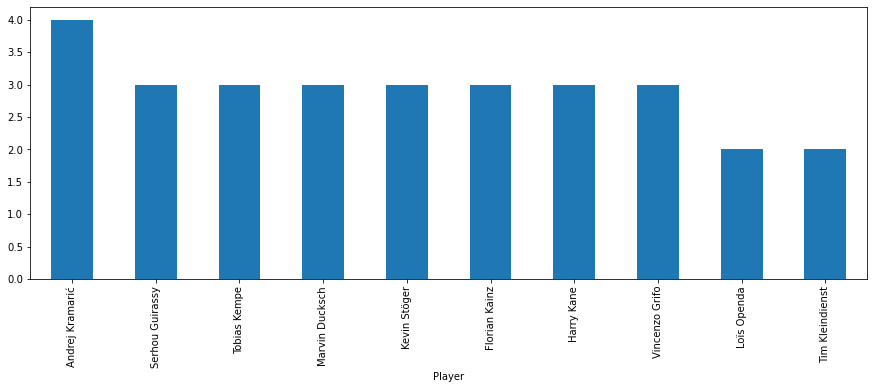

In [204]:
Tantative_tir_but_Bundesliga = Bundesliga.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_tir_but_Bundesliga.plot(figsize=(15,5),kind="bar")

In [205]:
Tantative_tir_but_Bundesliga = Bundesliga.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but de Bundesliga :",Tantative_tir_but_Bundesliga)

Le joueur qui tente le plus de tir au but de Bundesliga : Player
Andrej Kramarić    4
Name: PKatt, dtype: int64


# Les joueurs de Bundesliga qui jouent plus de minutes

In [206]:
titulaire_max_Bundesliga = Bundesliga[Bundesliga['Min']==Bundesliga['Min'].max()]
titulaire_max_Bundesliga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
130,Noah Atubolu,GER,GK,Freiburg,Bundesliga,21,16,16,1440,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
204,Oliver Baumann,GER,GK,Hoffenheim,Bundesliga,33,16,16,1440,0.0,1,1.0,0,0,0,1,0,0.0,0.1,1
269,Janis Blaswich,GER,GK,RB Leipzig,Bundesliga,32,16,16,1440,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
525,Finn Dahmen,GER,GK,Augsburg,Bundesliga,25,16,16,1440,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
1009,Lukáš Hrádecký,FIN,GK,Leverkusen,Bundesliga,34,16,16,1440,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1375,Patrick Mainka,GER,DF,Heidenheim,Bundesliga,29,16,16,1440,2.0,0,2.0,2,0,0,1,0,1.8,0.0,1
1605,Kevin Müller,GER,GK,Heidenheim,Bundesliga,32,16,16,1440,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
1685,Alexander Nübel,GER,GK,Stuttgart,Bundesliga,27,16,16,1440,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1768,Willian Pacho,ECU,DF,Eint Frankfurt,Bundesliga,22,16,16,1440,0.0,0,0.0,0,0,0,4,0,0.7,0.1,4
1964,Manuel Riemann,GER,GK,Bochum,Bundesliga,35,16,16,1440,0.0,0,0.0,0,0,0,2,0,0.0,0.1,2


In [207]:
print("Les joueurs de Bundesliga qui jouent plus de minutes  :", titulaire_max_Bundesliga[['Player','Squad','Min']])

Les joueurs de Bundesliga qui jouent plus de minutes  :                Player           Squad   Min
130      Noah Atubolu        Freiburg  1440
204    Oliver Baumann      Hoffenheim  1440
269    Janis Blaswich      RB Leipzig  1440
525       Finn Dahmen        Augsburg  1440
1009   Lukáš Hrádecký      Leverkusen  1440
1375   Patrick Mainka      Heidenheim  1440
1605     Kevin Müller      Heidenheim  1440
1685  Alexander Nübel       Stuttgart  1440
1768    Willian Pacho  Eint Frankfurt  1440
1964   Manuel Riemann          Bochum  1440
2110   Marvin Schwäbe            Köln  1440


# Les joueurs de Bundesliga qui jouent le moins de minutes

In [208]:
titulaire_min_Bundesliga = Bundesliga[Bundesliga['Min']==Bundesliga['Min'].min()]
titulaire_min_Bundesliga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
84,Kofi Amoako,GER,MF,Wolfsburg,Bundesliga,18,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
2046,Diadie Samassékou,MLI,MF,Hoffenheim,Bundesliga,27,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [209]:
print("Les joueurs de Bundesliga qui jouent le moins de minutes  :", titulaire_min_Bundesliga[['Player','Squad','Min']])

Les joueurs de Bundesliga qui jouent le moins de minutes  :                  Player       Squad  Min
84          Kofi Amoako   Wolfsburg    1
2046  Diadie Samassékou  Hoffenheim    1


# Le joueur les plus agressive de Bundesliga

In [210]:
Bundesliga[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
611,Eren Dinkçi,6,0,6
997,Nicolas Höfler,5,1,6
1177,Dominik Kohr,6,0,6
1890,Grischa Prömel,6,0,6
2098,Keven Schlotterbeck,6,0,6
47,Kevin Akpoguma,5,0,5
115,Maximilian Arnold,5,0,5
234,Ramy Bensebaini,4,1,5
433,Julian Chabot,4,1,5
569,Sepp van den Berg,5,0,5


In [211]:
Jouer_Agressive_Bundesliga = Bundesliga.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons de Bundesliga :",Jouer_Agressive_Bundesliga)

Le joueur avec le plus de cartons de Bundesliga : Player
Nicolas Höfler    6
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive de Bundesliga

<AxesSubplot:xlabel='Squad'>

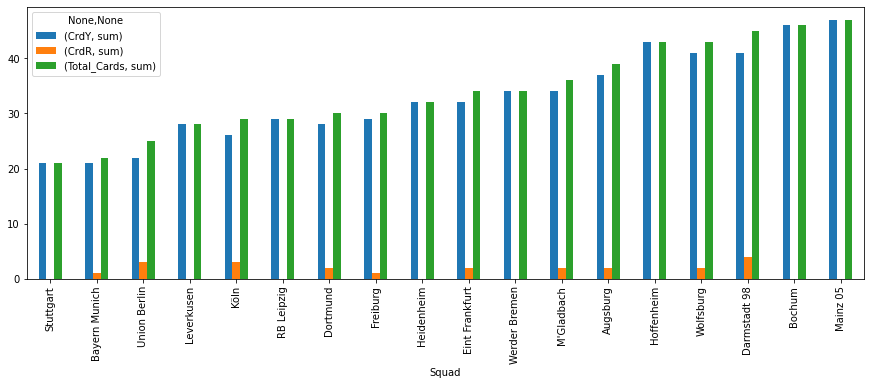

In [212]:
Equipe_agressif_Bundesliga = Bundesliga.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Equipe_agressif_Bundesliga.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [213]:
Aggressiv_Bundesliga = Bundesliga.groupby('Squad')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de cartons de la Liga :",Aggressiv_Bundesliga)

L'équipe avec le plus de cartons de la Liga : Squad
Mainz 05    47
Name: Total_Cards, dtype: int64


# Analyse Serie A

In [214]:
Serie_A = df.groupby("Comp").get_group('Serie A')
Serie_A

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
10,Francesco Acerbi,ITA,DF,Inter,Serie A,35,16,16,1440,1.0,1,2.0,1,0,0,1,0,1.0,1.7,1
21,Yacine Adli,FRA,MF,Milan,Serie A,23,9,5,443,0.0,0,0.0,0,0,0,1,0,0.0,0.2,1
23,Michel Aebischer,SUI,MF,Bologna,Serie A,27,19,13,1172,0.0,1,1.0,0,0,0,4,0,0.3,0.8,4
26,Lucien Agoume,FRA,MF,Inter,Serie A,21,1,0,5,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
39,Marley Aké,FRA,FW,Udinese,Serie A,23,1,0,10,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,Joshua Zirkzee,NED,FW,Bologna,Serie A,22,19,18,1589,7.0,2,9.0,6,1,1,5,0,5.2,2.5,5
2518,Zito,ANG,"FW,MF",Cagliari,Serie A,21,17,10,1100,3.0,2,5.0,3,0,0,2,0,2.1,2.1,2
2520,Nadir Zortea,ITA,DF,Atalanta,Serie A,24,5,0,149,1.0,0,1.0,1,0,0,1,0,0.1,0.3,1
2526,Milan Đurić,BIH,FW,Hellas Verona,Serie A,33,18,11,1049,4.0,1,5.0,3,1,2,2,0,3.4,1.1,2


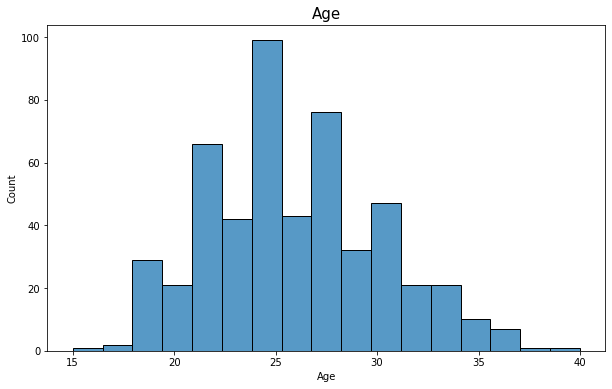

In [215]:
#Age
plt.figure(figsize=(10,6))
sns.histplot(Serie_A["Age"])
plt.title("Age", size=15)
plt.show()

In [216]:
#Age mini en Serie_A
Age_min_Serie_A = Serie_A[['Player','Age','Squad']].min()
print("Le Joueur le plus jeune de Serie_A :", Age_min_Serie_A)

Le Joueur le plus jeune de Serie_A : Player    Aarón Martín
Age                 15
Squad         Atalanta
dtype: object


In [217]:
#Age maxi en Liga
Age_max_Serie_A = Serie_A[['Player','Age','Squad']].max()
print("Le Joueur le plus vieux de Serie_A :", Age_max_Serie_A)

Le Joueur le plus vieux de Serie_A : Player    Łukasz Skorupski
Age                     40
Squad              Udinese
dtype: object


# La nationalité des joueur de Bundesliga

<AxesSubplot:>

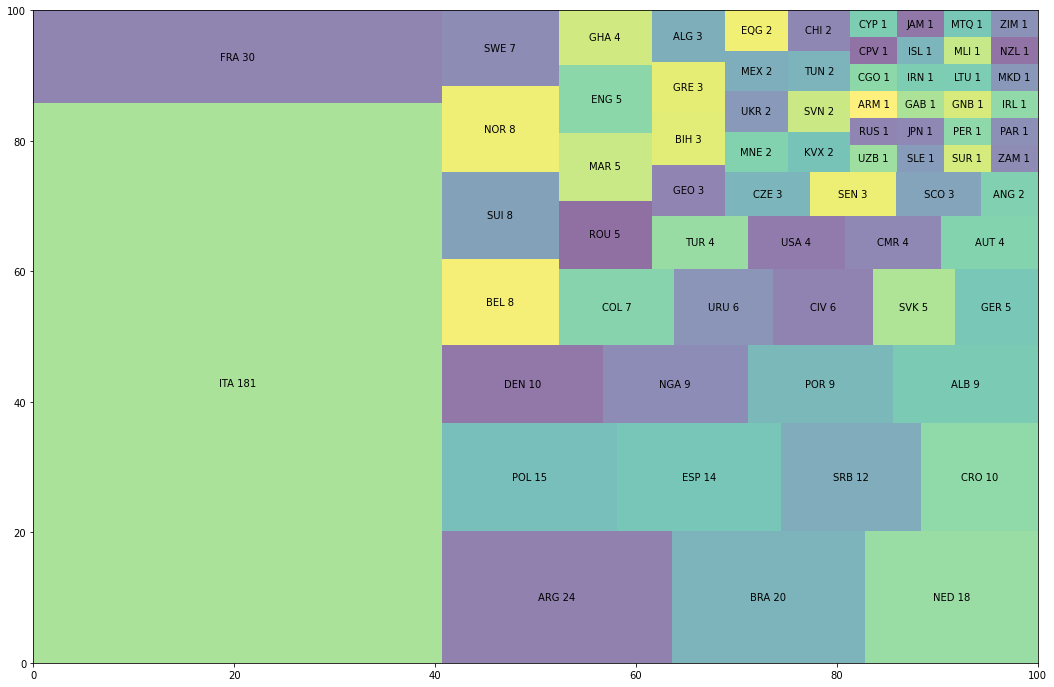

In [218]:
fig = plt.figure(figsize=(18,12))
sizes=Serie_A.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Serie_A.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

# L'équipe avec le plus de joueur de Bundesliga

<AxesSubplot:>

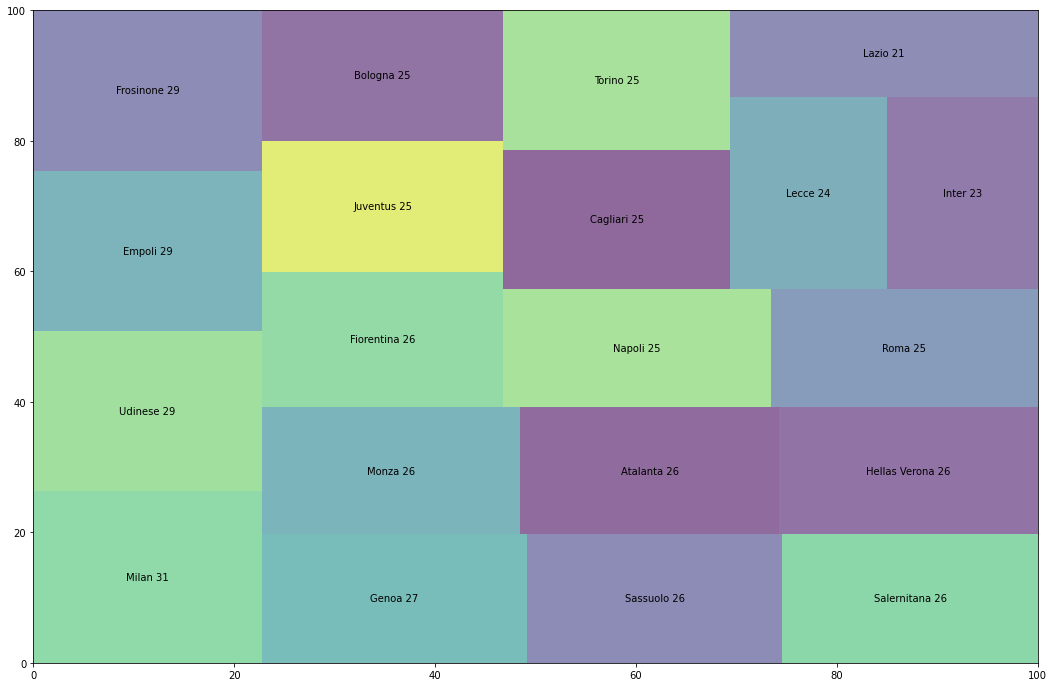

In [219]:
#Nombre de joueurs par equipes
fig = plt.figure(figsize=(18,12))
sizes=Serie_A.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Serie_A.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [220]:
NB_joueurs_equipes_Serie_A = Serie_A.groupby('Squad',)['Player'].count().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de joueur de Serie_A :",NB_joueurs_equipes_Serie_A)

L'équipe avec le plus de joueur de Serie_A : Squad
Milan    31
Name: Player, dtype: int64


# L'équipe qui marque le plus de but de Bundesliga

<AxesSubplot:xlabel='Squad'>

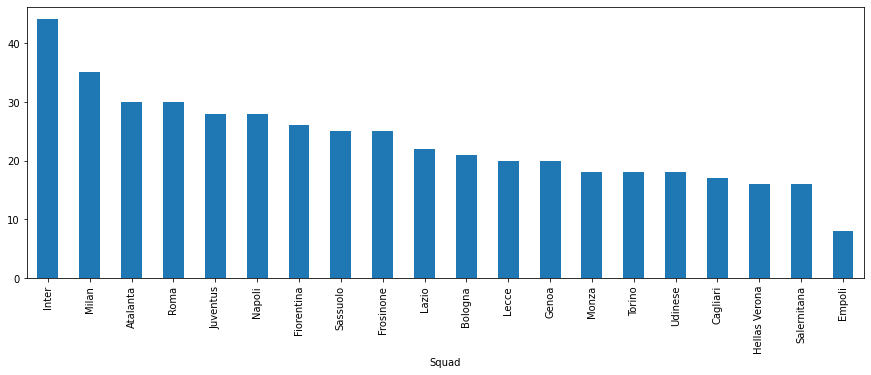

In [221]:
but_Equipe_Serie_A = Serie_A.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_Equipe_Serie_A.plot(figsize=(15,5),kind="bar")

In [222]:
but_Equipe_Serie_A = Serie_A.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)[:1]
print("L'équipe qui marque le plus en Serie_A:", but_Equipe_Serie_A)

L'équipe qui marque le plus en Serie_A: Squad
Inter    44.0
Name: Gls1, dtype: float64


# meilleur buteurs de Serie_A 

In [223]:
top_but_Serie_A = Serie_A.groupby(['Player', 'Squad'])['Gls1'].sum().sort_values(ascending = False).head(10).reset_index()
top_but_Serie_A

,Player,Squad,Gls1
0,Lautaro Martínez,Inter,16.0
1,Domenico Berardi,Sassuolo,9.0
2,Olivier Giroud,Milan,9.0
3,Matìas Soulé,Frosinone,8.0
4,Romelu Lukaku,Roma,8.0
5,Albert Guðmundsson,Genoa,8.0
6,Joshua Zirkzee,Bologna,7.0
7,Hakan Çalhanoğlu,Inter,7.0
8,Ademola Lookman,Atalanta,7.0
9,Dušan Vlahović,Juventus,7.0


In [224]:
top_but_Serie_A = Serie_A.groupby('Player')['Gls1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs de Serie_A est :", top_but_Serie_A)

Le meilleur buteurs de Serie_A est : Player
Lautaro Martínez    16.0
Name: Gls1, dtype: float64


# Meilleur buteur sur penalty Serie_A

<AxesSubplot:xlabel='Player'>

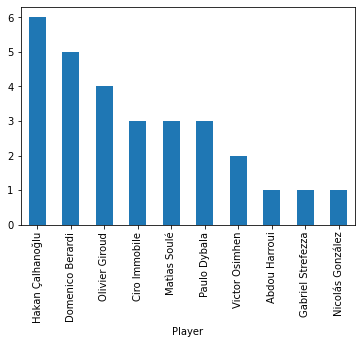

In [225]:
but_sur_penalty_Serie_A = Serie_A[['Player', 'Squad', 'PK']].sort_values(by="PK", ascending=False)[:10]
but_sur_penalty_Serie_A.groupby('Player')['PK'].sum().sort_values(ascending = False).plot(kind="bar")

In [226]:
but_sur_penalty_Serie_A = Serie_A.groupby('Player')['PK'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteur dur penalty de Serie_A est :", but_sur_penalty_Serie_A)

Le meilleur buteur dur penalty de Serie_A est : Player
Hakan Çalhanoğlu    6
Name: PK, dtype: int64


# Meilleur buteur sans penalty Serie_A

<AxesSubplot:xlabel='Player'>

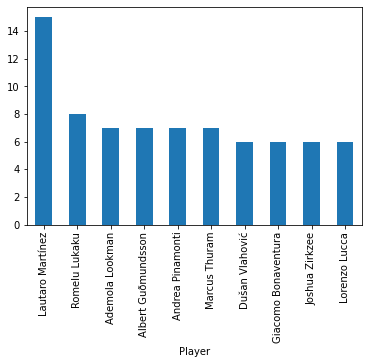

In [227]:
but_sans_penalty_Serie_A = Serie_A[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Serie_A.groupby('Player')['G-PK1'].sum().sort_values(ascending = False).plot(kind="bar")

In [228]:
but_sans_penalty_Serie_A = Serie_A.groupby('Player')['G-PK1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteur sans penalty de Serie_A est :", but_sans_penalty_Serie_A)

Le meilleur buteur sans penalty de Serie_A est : Player
Lautaro Martínez    15
Name: G-PK1, dtype: int64


# meilleur passeur de Serie_A 

<AxesSubplot:xlabel='Player'>

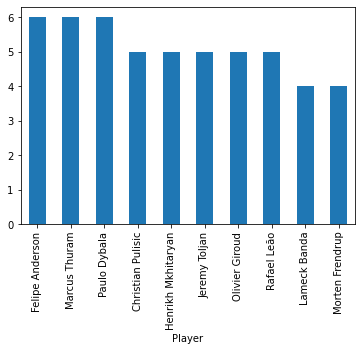

In [229]:
top_passeur_Serie_A = Serie_A[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_passeur_Serie_A.groupby('Player')['Ast1'].sum().sort_values(ascending = False).plot(kind="bar")

In [230]:
top_passeur_Serie_A = Serie_A.groupby('Player')['Ast1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur passeur de Serie_A est :", top_passeur_Serie_A)

Le meilleur passeur de Serie_A est : Player
Marcus Thuram    6
Name: Ast1, dtype: int64


# meilleurs buteurs + passeur de Serie_A

In [231]:
top_but_passeur_Serie_A = Serie_A[['Player', 'Squad','Gls1', 'Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_Serie_A

,Player,Squad,Gls1,Ast1,G+A1
1439,Lautaro Martínez,Inter,16.0,2,18.0
845,Olivier Giroud,Milan,9.0,5,14.0
2292,Marcus Thuram,Inter,7.0,6,13.0
238,Domenico Berardi,Sassuolo,9.0,3,12.0
1896,Christian Pulisic,Milan,6.0,5,11.0
674,Paulo Dybala,Roma,5.0,6,11.0
2412,Dušan Vlahović,Juventus,7.0,3,10.0
365,Hakan Çalhanoğlu,Inter,7.0,3,10.0
929,Albert Guðmundsson,Genoa,8.0,2,10.0
1316,Ademola Lookman,Atalanta,7.0,3,10.0


In [232]:
top_but_passeur_Serie_A = Serie_A.groupby('Player')['G+A1'].sum().sort_values(ascending = False)[:1]
print("Le meilleur buteurs + passeur de Serie_A est :", top_but_passeur_Serie_A)

Le meilleur buteurs + passeur de Serie_A est : Player
Lautaro Martínez    18.0
Name: G+A1, dtype: float64


#  Le meilleur score xG Buts attendus de Serie_A

<AxesSubplot:ylabel='Player'>

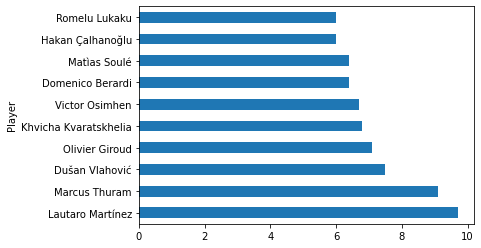

In [233]:
xG_Buts_attendus_Serie_A = Serie_A[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_Serie_A.groupby('Player')['xG1'].sum().sort_values(ascending = False).plot(kind="barh")

In [234]:
xG_Buts_attendus_Serie_A = Serie_A[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en Serie_A est :", xG_Buts_attendus_Serie_A)

Le meilleur score xG Buts attendus en Serie_A est :                 Player  Squad  xG1
1439  Lautaro Martínez  Inter  9.7


# Le meilleur score xAG Buts assisté de Serie_A

In [235]:
xAG_Buts_assistés_attendus_Serie_A = Serie_A[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_Serie_A

,Player,Squad,xAG1
1193,Filip Kostić,Juventus,4.3
608,Federico Dimarco,Inter,4.3
1265,Rafael Leão,Milan,4.2
1191,Teun Koopmeiners,Atalanta,3.6
88,Felipe Anderson,Lazio,3.6
1875,Matteo Politano,Napoli,3.5
578,Giovanni Di Lorenzo,Napoli,3.3
365,Hakan Çalhanoğlu,Inter,3.3
2195,Matìas Soulé,Frosinone,3.3
1029,Ivan Ilić,Torino,3.3


In [236]:
xAG_Buts_assistés_attendus_Serie_A = Serie_A[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:1]
print("Le meilleur score xG Buts attendus en Serie_A est :", xAG_Buts_assistés_attendus_Serie_A)

Le meilleur score xG Buts attendus en Serie_A est :             Player     Squad  xAG1
1193  Filip Kostić  Juventus   4.3


# Le joueur qui tente le plus de tir au but de la Serie_A 

<AxesSubplot:xlabel='Player'>

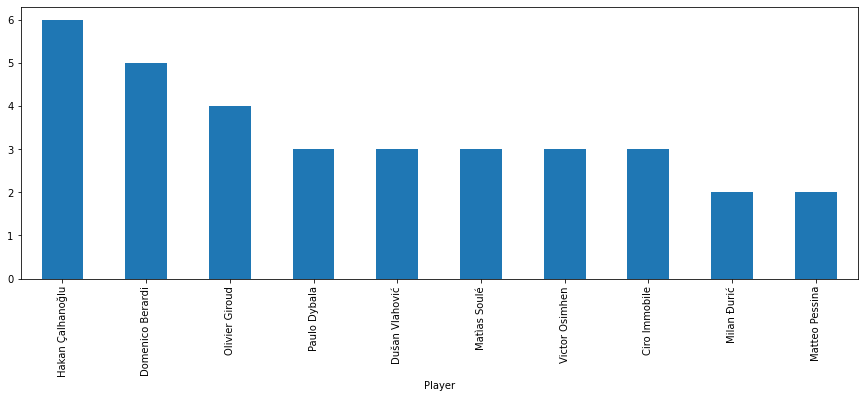

In [237]:
Tantative_tir_but_Serie_A = Serie_A.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:10]
Tantative_tir_but_Serie_A.plot(figsize=(15,5),kind="bar")

In [238]:
Tantative_tir_but_Serie_A = Serie_A.groupby('Player')['PKatt'].sum().sort_values(ascending = False)[:1]
print("Le joueur qui tente le plus de tir au but de la Serie_A :",Tantative_tir_but_Serie_A)

Le joueur qui tente le plus de tir au but de la Serie_A : Player
Hakan Çalhanoğlu    6
Name: PKatt, dtype: int64


# Les joueurs de Serie_A qui jouent le plus de minutes 

In [239]:
titulaire_max_Serie_A = Serie_A[Serie_A['Min']==Serie_A['Min'].max()]
titulaire_max_Serie_A

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
511,Bryan Cristante,ITA,"MF,DF",Roma,Serie A,28,19,19,1710,2.0,2,4.0,2,0,0,4,0,2.1,2.2,4
578,Giovanni Di Lorenzo,ITA,DF,Napoli,Serie A,30,19,19,1710,1.0,4,5.0,1,0,0,4,0,1.8,3.3,4
660,Radu Drăgușin,ROU,DF,Genoa,Serie A,21,19,19,1710,2.0,1,3.0,2,0,0,1,0,1.0,0.8,1
722,Wladimiro Falcone,ITA,GK,Lecce,Serie A,28,19,19,1710,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
780,Morten Frendrup,DEN,MF,Genoa,Serie A,22,19,19,1710,0.0,4,4.0,0,0,0,4,0,0.9,0.9,4
1350,Sebastiano Luperto,ITA,DF,Empoli,Serie A,27,19,19,1710,0.0,0,0.0,0,0,0,1,0,0.6,0.4,1
1579,Lorenzo Montipò,ITA,GK,Hellas Verona,Serie A,27,19,19,1710,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1798,Rui Patrício,POR,GK,Roma,Serie A,35,19,19,1710,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
1837,Nehuén Pérez,ARG,DF,Udinese,Serie A,23,19,19,1710,0.0,0,0.0,0,0,0,4,0,0.8,0.1,4
1891,Ivan Provedel,ITA,GK,Lazio,Serie A,29,19,19,1710,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [240]:
print("Les joueurs de Serie_A qui jouent le plus de minutes  :", titulaire_max_Serie_A[['Player','Squad','Min']])

Les joueurs de Serie_A qui jouent le plus de minutes  :                    Player          Squad   Min
511       Bryan Cristante           Roma  1710
578   Giovanni Di Lorenzo         Napoli  1710
660         Radu Drăgușin          Genoa  1710
722     Wladimiro Falcone          Lecce  1710
780       Morten Frendrup          Genoa  1710
1350   Sebastiano Luperto         Empoli  1710
1579      Lorenzo Montipò  Hellas Verona  1710
1798         Rui Patrício           Roma  1710
1837         Nehuén Pérez        Udinese  1710
1891        Ivan Provedel          Lazio  1710
2185          Yann Sommer          Inter  1710


# Les joueurs de Serie_A qui jouent le moins de minutes 

In [241]:
titulaire_min_Serie_A = Serie_A[Serie_A['Min']==Serie_A['Min'].min()]
titulaire_min_Serie_A

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
438,Charlys,BRA,MF,Hellas Verona,Serie A,19,1,0,1,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [242]:
print("Les joueurs de Serie_A qui jouent le moins de minutes  :", titulaire_min_Serie_A[['Player','Squad','Min']])

Les joueurs de Serie_A qui jouent le moins de minutes  :       Player          Squad  Min
438  Charlys  Hellas Verona    1


# Le joueur les plus agressive de Serie A

In [243]:
Serie_A[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
932,Norbert Gyömbér,9,0,9
1788,Leandro Paredes,9,0,9
190,Enzo Barrenechea,8,0,8
666,Ondrej Duda,7,1,8
1363,Giulio Maggiore,7,1,8
1386,Youssef Maleh,8,0,8
1912,Ylber Ramadani,8,0,8
1922,Luca Ranieri,8,0,8
2002,Marten de Roon,7,0,7
2031,Alexis Saelemaekers,6,1,7


In [244]:
Jouer_Agressive_Serie_A = Serie_A.groupby('Player')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("Le joueur avec le plus de cartons de Serie_A :",Jouer_Agressive_Serie_A)

Le joueur avec le plus de cartons de Serie_A : Player
Leandro Paredes    9
Name: Total_Cards, dtype: int64


# L'équipe la plus agressive de Serie A

<AxesSubplot:xlabel='Squad'>

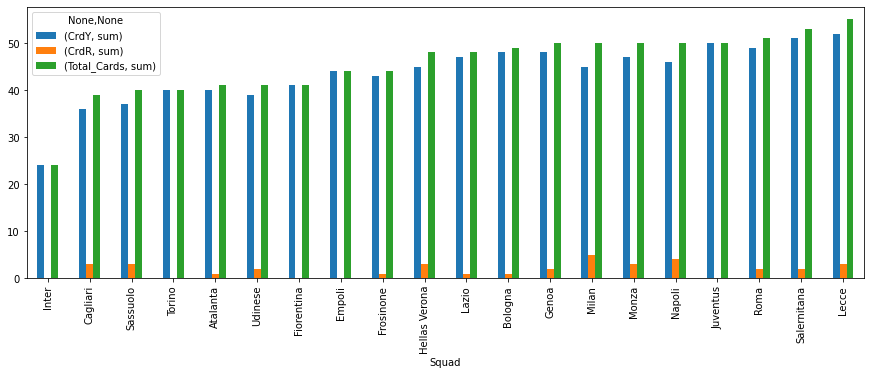

In [245]:
Equipe_agressif_Serie_A = Serie_A.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Equipe_agressif_Serie_A.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

In [246]:
Equipe_agressif_Serie_A = Serie_A.groupby('Squad')['Total_Cards'].sum().sort_values(ascending = False)[:1]
print("L'équipe avec le plus de cartons de Serie_A :",Equipe_agressif_Serie_A)

L'équipe avec le plus de cartons de Serie_A : Squad
Lecce    55
Name: Total_Cards, dtype: int64
